# Rainfall Prediction - Weather Forecasting Project

## Importing Libraries

In [1]:
#Import libraries 

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings("ignore")

Importing all required libraries

## Loading the Dataset

In [2]:
#Import the dataset

df_rainfall_prediction= pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df_rainfall_prediction

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0     2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1     2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2     2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3     2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4     2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   
...          ...      ...      ...      ...       ...          ...       ...   
8420  2017-06-21    Uluru      2.8     23.4       0.0          NaN       NaN   
8421  2017-06-22    Uluru      3.6     25.3       0.0          NaN       NaN   
8422  2017-06-23    Uluru      5.4     26.9       0.0          NaN       NaN   
8423  2017-06-24    Uluru      7.8     27.0       0.0          NaN       NaN   
8424  2017-06-25    Uluru     14.9      NaN       0.0          NaN       NaN   

     WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0              W           44.0          W  ...        71.0         22.0   
1            WNW           44.0        NNW  ...        44.0         25.0   
2            WSW           46.0          W  ...        38.0         30.0   
3             NE           24.0         SE  ...        45.0         16.0   
4              W           41.0        ENE  ...        82.0         33.0   
...          ...            ...        ...  ...         ...          ...   
8420           E           31.0         SE  ...        51.0         24.0   
8421         NNW           22.0         SE  ...        56.0         21.0   
8422           N           37.0         SE  ...        53.0         24.0   
8423          SE           28.0        SSE  ...        51.0         24.0   
8424         NaN            NaN        ESE  ...        62.0         36.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1007.7       1007.1       8.0       NaN     16.9     21.8   
1          1010.6       1007.8       NaN       NaN     17.2     24.3   
2          1007.6       1008.7       NaN       2.0     21.0     23.2   
3          1017.6       1012.8       NaN       NaN     18.1     26.5   
4          1010.8       1006.0       7.0       8.0     17.8     29.7   
...           ...          ...       ...       ...      ...      ...   
8420       1024.6       1020.3       NaN       NaN     10.1     22.4   
8421       1023.5       1019.1       NaN       NaN     10.9     24.5   
8422       1021.0       1016.8       NaN       NaN     12.5     26.1   
8423       1019.4       1016.5       3.0       2.0     15.1     26.0   
8424       1020.2       1017.9       8.0       8.0     15.0     20.9   

      RainToday  RainTomorrow  
0            No            No  
1            No            No  
2            No            No  
3            No            No  
4            No            No  
...         ...           ...  
8420         No            No  
8421         No            No  
8422         No            No  
8423         No            No  
8424         No           NaN  

[8425 rows x 23 columns]

We see that our dataset consists of a total of 8425 rows and 23 columns. There are numerical data columns as well as categorical data columns in the dataset. Later, we have to convert the categorical columns to numerical to train our model. 

## Shape of data with number of rows and columns


In [3]:
df_rainfall_prediction.shape

(8425, 23)

There are 8425 rows and 23 columns in dataset

We are required to predict 2 labels 'RainTomorrow' and 'Rainfall'. By looking at the values present in the column 'RainTomorrow', we see that there are categorical data in that colum. Considering it as our label then it will be a Classification problem.

And if we look at the values present in the column 'Rainfall', we see that there are continous data in that column so considering it as our label, it will be a Regression problem.

## Key Attributes of the Database

The dataset consists of 23 columns as explained below:

- Date - The date of observation
- Location  -The common name of the location of the weather station
- MinTemp  -The minimum temperature in degrees celsius
- MaxTemp -The maximum temperature in degrees celsius
- Rainfall  -The amount of rainfall recorded for the day in mm
- Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine  -The number of hours of bright sunshine in the day.
- WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am -Direction of the wind at 9am
- WindDir3pm -Direction of the wind at 3pm
- WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am -Humidity (percent) at 9am
- Humidity3pm -Humidity (percent) at 3pm
- Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am - Fraction of sky obscured by cloud at 9am. 
- Cloud3pm -Fraction of sky obscured by cloud 
- Temp9am-Temperature (degrees C) at 9am
- Temp3pm -Temperature (degrees C) at 3pm
- RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

In [4]:
#checking column names
df_rainfall_prediction.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
#checking the datatype information
df_rainfall_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

There are 16 numerical features and 7 discrete(categorical) features.

## Statistical Analysis

In [6]:
df_rainfall_prediction.describe().T

count         mean        std    min      25%     50%     75%  \
MinTemp        8350.0    13.193305   5.403596   -2.0     9.20    13.3    17.4   
MaxTemp        8365.0    23.859976   6.136408    8.2    19.30    23.3    28.0   
Rainfall       8185.0     2.805913  10.459379    0.0     0.00     0.0     1.0   
Evaporation    4913.0     5.389395   5.044484    0.0     2.60     4.6     7.0   
Sunshine       4431.0     7.632205   3.896235    0.0     4.75     8.7    10.7   
WindGustSpeed  7434.0    40.174469  14.665721    7.0    30.00    39.0    50.0   
WindSpeed9am   8349.0    13.847646  10.174579    0.0     6.00    13.0    20.0   
WindSpeed3pm   8318.0    18.533662   9.766986    0.0    11.00    19.0    24.0   
Humidity9am    8366.0    67.822496  16.833283   10.0    56.00    68.0    80.0   
Humidity3pm    8323.0    51.249790  18.423774    6.0    39.00    51.0    63.0   
Pressure9am    7116.0  1017.640233   6.828699  989.8  1013.00  1017.7  1022.3   
Pressure3pm    7113.0  1015.236075   6.766681  982.9  1010.40  1015.3  1019.8   
Cloud9am       6004.0     4.566622   2.877658    0.0     1.00     5.0     7.0   
Cloud3pm       5970.0     4.503183   2.731659    0.0     2.00     5.0     7.0   
Temp9am        8369.0    17.762015   5.627035    1.9    13.80    17.8    21.9   
Temp3pm        8329.0    22.442934   5.980020    7.3    18.00    21.9    26.4   

                  max  
MinTemp          28.5  
MaxTemp          45.5  
Rainfall        371.0  
Evaporation     145.0  
Sunshine         13.9  
WindGustSpeed   107.0  
WindSpeed9am     63.0  
WindSpeed3pm     83.0  
Humidity9am     100.0  
Humidity3pm      99.0  
Pressure9am    1039.0  
Pressure3pm    1036.0  
Cloud9am          8.0  
Cloud3pm          8.0  
Temp9am          39.4  
Temp3pm          44.1

In the above cell, we see that the count for some of the columns is different which indicates that there are missing values present in those columns.

## Datatypes of all columns

In [7]:
df_rainfall_prediction.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

Date, Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow columns are having object datatype and rest of the columns are having float datatype.

## Checking for null values

In [8]:
#check for is there any null values present in the dataset 

df_rainfall_prediction.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<AxesSubplot:>

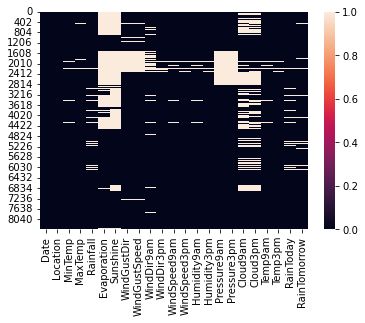

In [9]:
#To check missing values using heatmap
sns.heatmap(df_rainfall_prediction.isnull())

We can see that there are missing values in many columns and that will need to be removed since it provides no insights.

Only 25-30% of missing value can be allowed in the dataset and greater than that need to be removed. Columns that need to be deleted are:

- Evaporation
- Sunshine
- Pressure9am
- Pressure3pm
- Cloud9am
- Cloud3pm

In [10]:
#dropping the columns having more than 30% missing values
df_rainfall_prediction.drop(['Evaporation',                 
'Sunshine',                
'Pressure9am',                 
'Pressure3pm',          
'Cloud9am',
'Cloud3pm'],axis=1,inplace=True)

In [11]:
#checking the dimension of the dataset after dropping the columns
df_rainfall_prediction.shape

(8425, 17)

In [12]:
#checking the null values after dropping some columns
df_rainfall_prediction.isnull().sum()

Date               0
Location           0
MinTemp           75
MaxTemp           60
Rainfall         240
WindGustDir      991
WindGustSpeed    991
WindDir9am       829
WindDir3pm       308
WindSpeed9am      76
WindSpeed3pm     107
Humidity9am       59
Humidity3pm      102
Temp9am           56
Temp3pm           96
RainToday        240
RainTomorrow     239
dtype: int64

In [13]:
#checking unique values
df_rainfall_prediction.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

## Data Pre-processing

In [14]:
# filling missing data for continous values
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

df_rainfall_prediction['MinTemp']=imp_mean.fit_transform(df_rainfall_prediction['MinTemp'].values.reshape(-1,1))
df_rainfall_prediction['MaxTemp']=imp_mean.fit_transform(df_rainfall_prediction['MaxTemp'].values.reshape(-1,1))
df_rainfall_prediction['WindGustSpeed']=imp_mean.fit_transform(df_rainfall_prediction['WindGustSpeed'].values.reshape(-1,1))
df_rainfall_prediction['WindSpeed9am']=imp_mean.fit_transform(df_rainfall_prediction['WindSpeed9am'].values.reshape(-1,1))
df_rainfall_prediction['WindSpeed3pm']=imp_mean.fit_transform(df_rainfall_prediction['WindSpeed3pm'].values.reshape(-1,1))
df_rainfall_prediction['Humidity9am']=imp_mean.fit_transform(df_rainfall_prediction['Humidity9am'].values.reshape(-1,1))
df_rainfall_prediction['Humidity3pm']=imp_mean.fit_transform(df_rainfall_prediction['Humidity3pm'].values.reshape(-1,1))
df_rainfall_prediction['Temp9am']=imp_mean.fit_transform(df_rainfall_prediction['Temp9am'].values.reshape(-1,1))
df_rainfall_prediction['Temp3pm']=imp_mean.fit_transform(df_rainfall_prediction['Temp3pm'].values.reshape(-1,1))
df_rainfall_prediction['Rainfall']=imp_mean.fit_transform(df_rainfall_prediction['Rainfall'].values.reshape(-1,1))


# filling missing data for categorical values
imp_mode = SimpleImputer(strategy = "most_frequent")

df_rainfall_prediction['WindGustDir']=imp_mode.fit_transform(df_rainfall_prediction['WindGustDir'].values.reshape(-1,1))
df_rainfall_prediction['WindDir9am']=imp_mode.fit_transform(df_rainfall_prediction['WindDir9am'].values.reshape(-1,1))
df_rainfall_prediction['WindDir3pm']=imp_mode.fit_transform(df_rainfall_prediction['WindDir3pm'].values.reshape(-1,1))
df_rainfall_prediction['RainToday']=imp_mode.fit_transform(df_rainfall_prediction['RainToday'].values.reshape(-1,1))
df_rainfall_prediction['RainTomorrow']=imp_mode.fit_transform(df_rainfall_prediction['RainTomorrow'].values.reshape(-1,1))

In [15]:
df_rainfall_prediction.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

We can see that there is no missing values in the dataset.

In [16]:
# getting list of object data type column names
object_datatype = []
for x in df_rainfall_prediction.dtypes.index:
    if df_rainfall_prediction.dtypes[x] == 'object':
        object_datatype.append(x)
print(f"Object Datatype Columns are: ", object_datatype)


# getting the list of float data type column names
float_datatype = []
for x in df_rainfall_prediction.dtypes.index:
    if df_rainfall_prediction.dtypes[x] == 'float64':
        float_datatype.append(x)
print(f"Float Datatype Columns are: ", float_datatype)

Object Datatype Columns are:  ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Float Datatype Columns are:  ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Temp9am', 'Temp3pm']


# EDA (Exploratory Data Analysis)

## Uni Variate Analysis

Uni variate analysis works with only one variable, hence it is called as uni variate.

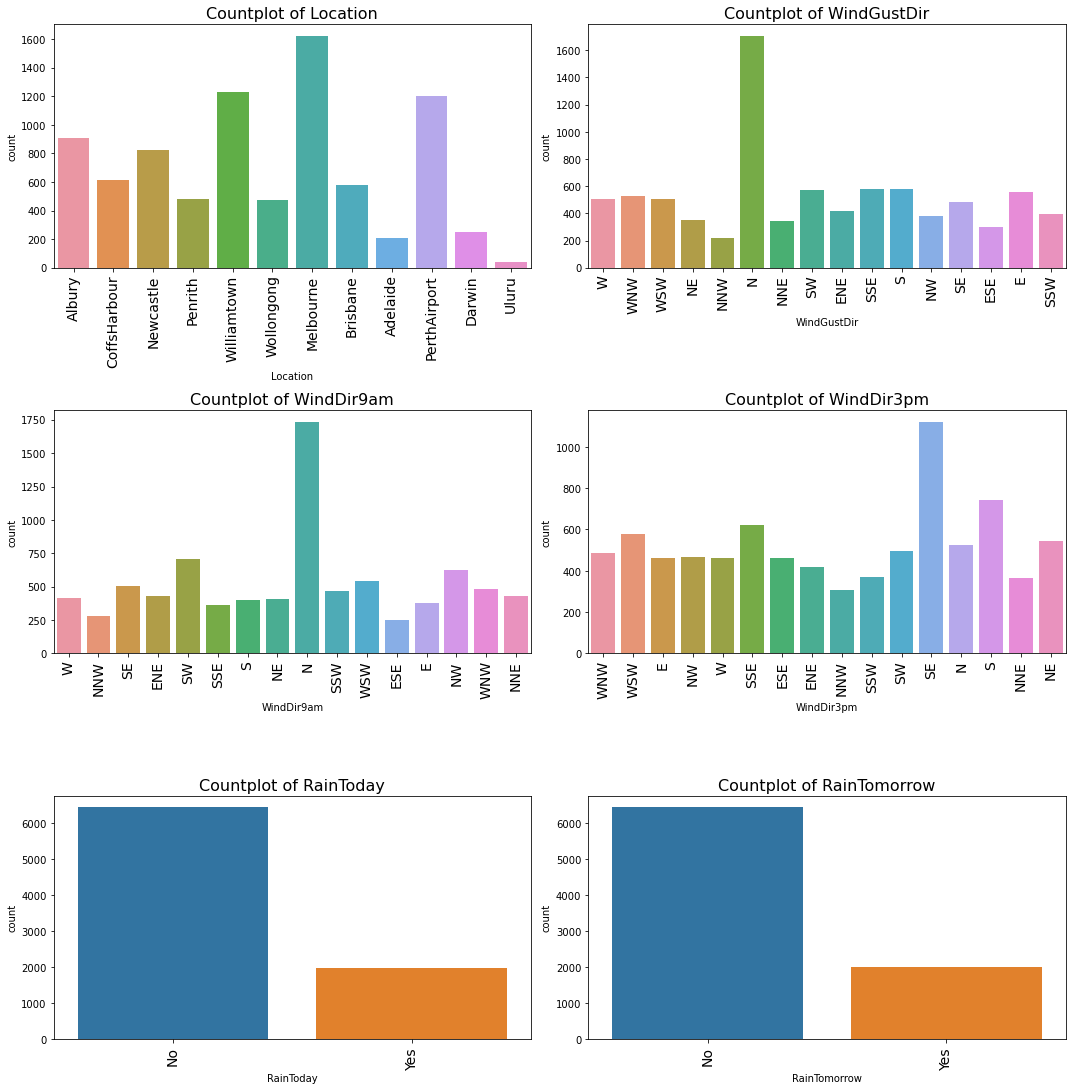

In [17]:
#checking countplot for the feature columns
col=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

plt.figure(figsize=(15,20))
for i in range(0,len(col)):
    plt.subplot(4,2,i+1)
    sns.countplot(df_rainfall_prediction[col[i]])
    plt.title(f"Countplot of {col[i]}",fontsize=16)
    plt.xticks(rotation=90, fontsize=14)
    plt.tight_layout()

- In the Location plot, we can see that the highest number of values have been covered by Melbourne and Williamtown followed by PerthAirport and, then comes Albury and Newcastle. We also see that Uluru, Adelaide and Darwin have very low data counts.
- In the WindGustDir plot, we can see that the direction of strongest wind gust is from North(N) and the lowest wind direction is from North-North-West(NNW) followed by North-East(NE).
- In the WindDir9am plot, we can see that the highest count of the direction of wind at 9 am is from North(N) and lowest count of the direction is from East-South-East(ESE).
- In the WindDir3pm plot, we can see that the highest count of the direction of wind at 3 pm is from Soth-East(SE) and lowest count of the direction is from North-North-West(NNW).
- In the RainToday plot, we can see that the highest count is for No and lowest count is for Yes.
- In the RainTomorrow plot, we can see that the highest count is for No and lowest count is for Yes.

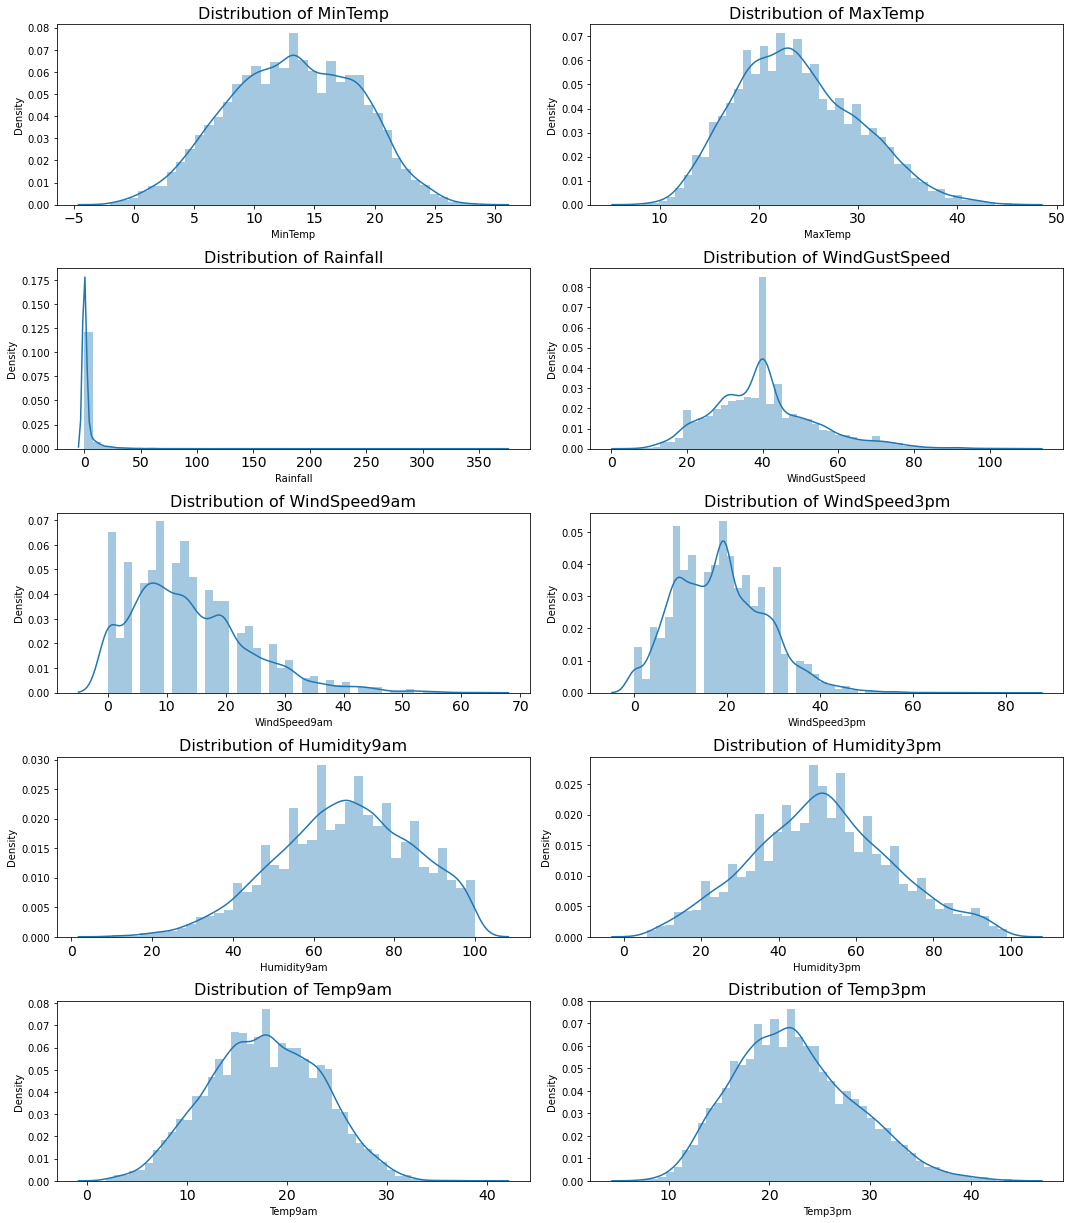

In [18]:
#checking distribution plot for the continuous values columns
plt.figure(figsize=(15,20))
for i in range(0,len(float_datatype)):
    plt.subplot(6,2,i+1)
    sns.distplot(df_rainfall_prediction[float_datatype[i]])
    plt.title(f"Distribution of {float_datatype[i]}",fontsize=16)
    plt.xticks(fontsize=14)
    plt.tight_layout()

- For MinTemp plot, we can see that it is almost normally distributed. In most of the days, minimum temperature is observed between 8-12 degree.
- For MaxTemp plot, we can see that it is also normally distributed. For most of the days, maximum temperature is observed between 18-22 degree.
- For Rainfall plot, we can see that it is right skewed and not normally distributed. In most of the days rainfall observed to be zero.
- For WindGustSpeed plot, we can see that it is slightly left skewed. Most of the days, speed of the Wind Gust is observed between 10-80 mm.
- For WindSpeed9am and WindSpeed3pm plots, we can see that it is almost left skewed. For most of the days, at 10 minutes prior of 9am or 3pm the speed of the wind is between 0 to 50 km/hr.
- For Humidity9am plot, we can see that it is right skewed and humidity is about 20 to 100 percent.
- For Humidity3pm plot, we can see that it has some data point only in middle so it has middle peak only and humidity is about 10 to 100 percent.
- For Temp9am and Temp3pm plots, we can see that it is normally distributed.

Scatter plot for MinTemp column:


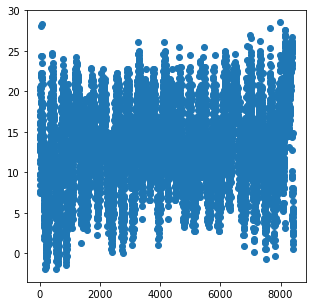

Scatter plot for MaxTemp column:


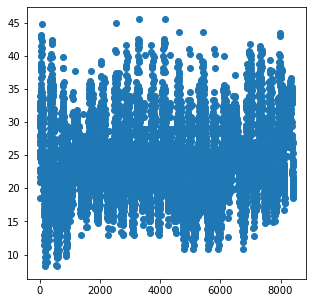

Scatter plot for Rainfall column:


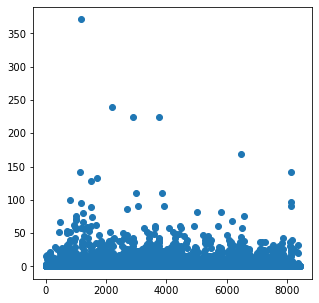

Scatter plot for WindGustSpeed column:


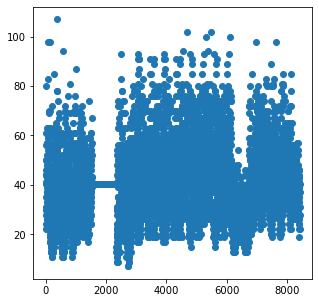

Scatter plot for WindSpeed9am column:


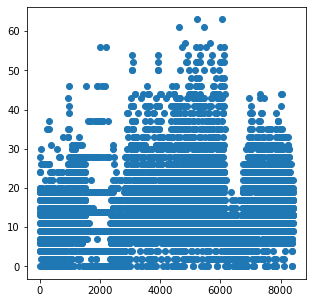

Scatter plot for WindSpeed3pm column:


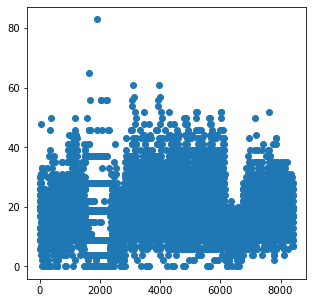

Scatter plot for Humidity9am column:


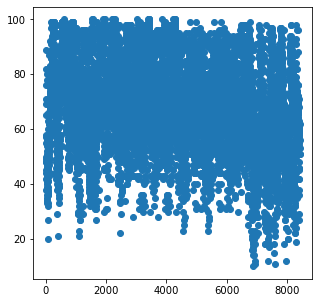

Scatter plot for Humidity3pm column:


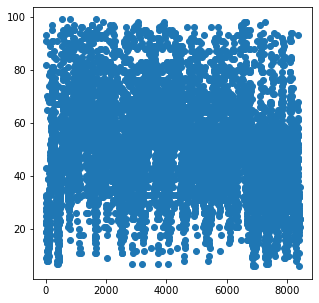

Scatter plot for Temp9am column:


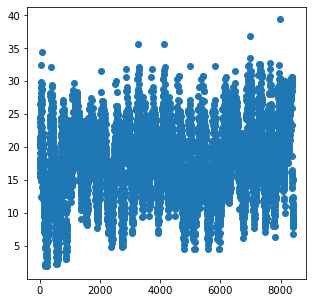

Scatter plot for Temp3pm column:


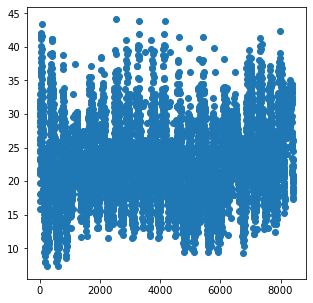

In [19]:
#checking scatter plot for the continuous values columns
for i in df_rainfall_prediction[float_datatype]:
    plt.figure(figsize=(5,5))
    print(f"Scatter plot for {i} column:" )
    plt.scatter(df_rainfall_prediction.index, df_rainfall_prediction[i])
    plt.show()

In the above cell, we have generated scatter plots for each and every numeric value column having more than 30 unique values showing the dispersion of datapoints where y-axis contains the column details and x-axis has the index of all the rows corresponding to where those information are present.

## Bi variate analysis

Bi variate analysis works with two variables.

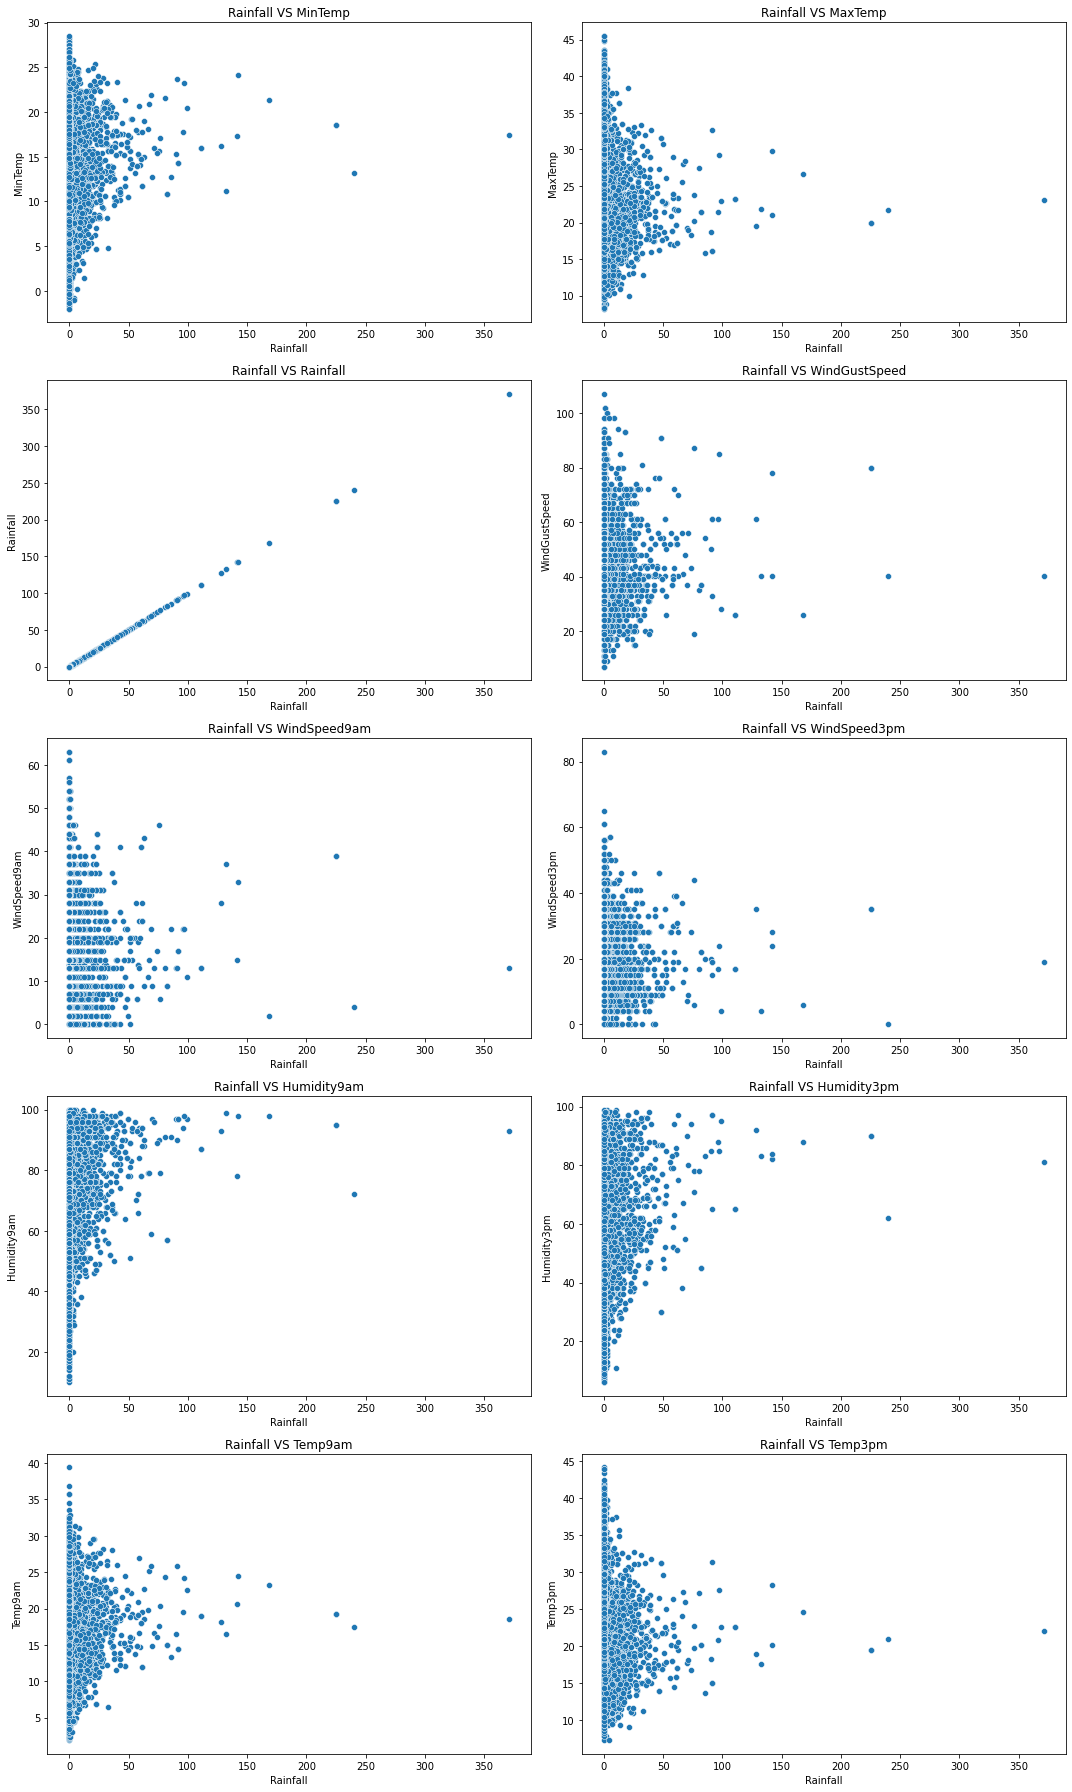

In [20]:
#checking the relationship of Rainfall with the feature columns using scatterplot
plt.figure(figsize=(15,25))
for i in range(0,len(float_datatype)):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=df_rainfall_prediction['Rainfall'],y=df_rainfall_prediction[float_datatype[i]])
    plt.title(f"Rainfall VS {float_datatype[i]}")
    plt.tight_layout()

- From MinTemp and MaxTemp plots, we can see that minimum temperature is about 0C and maximum temperature is about 45C.
- From WindGustSpeed plot, we can see that speed of Wind Gust will increase then rainfall will be decreased.
- From WindSpeed9am and WindSpeed3pm plots, we can see that the speed will increase then rainfall will be decreased.
- From Humidity9am and Humidity3pm plots, we can see that the speed will increase then rainfall will also be increased.
- From Temp9am and Temp3pm plots, we can see that the temperature at 9am or 3pm will be increased but rainfall will not be increased.

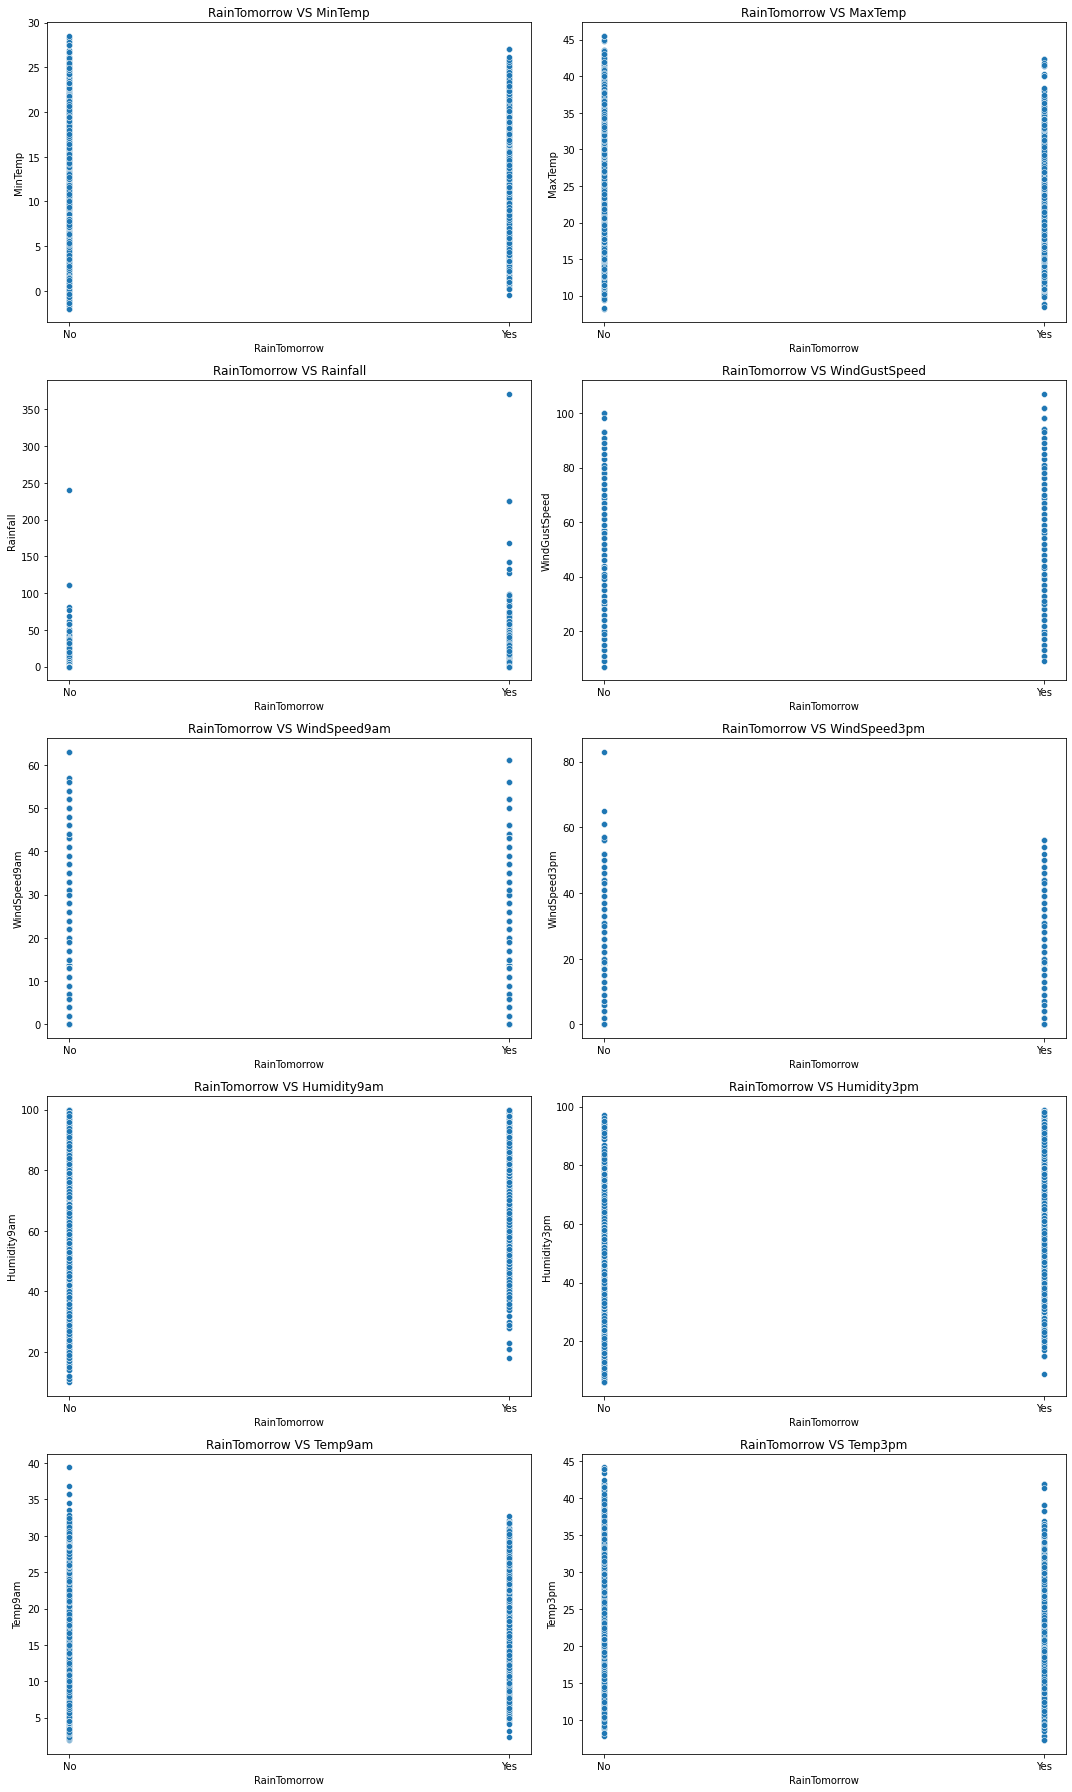

In [21]:
#checking the relationship of RainTomorrow with the feature columns using scatterplot
plt.figure(figsize=(15,25))
for i in range(0,len(float_datatype)):
    plt.subplot(5,2,i+1)
    sns.scatterplot(x=df_rainfall_prediction['RainTomorrow'],y=df_rainfall_prediction[float_datatype[i]])
    plt.title(f"RainTomorrow VS {float_datatype[i]}")
    plt.tight_layout()

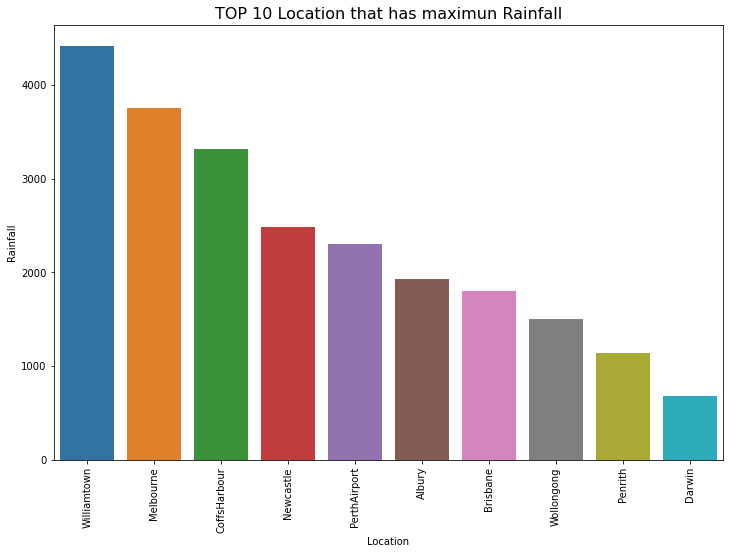

In [22]:
#plotting barplot for Rainfall vs Location
df1_rainfall=df_rainfall_prediction.groupby('Location')['Rainfall'].sum()
df1_rainfall=df1_rainfall.reset_index()
df1_rainfall=df1_rainfall.sort_values(by=('Rainfall'),ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x='Location',y='Rainfall',data=df1_rainfall.head(10))
plt.title("TOP 10 Location that has maximun Rainfall",fontsize=16)
plt.xticks(rotation=90)
plt.show()

We see that "Williamtown stps" is the top most location that has the maximun rainfall and "Darwin" is the location that has the minimum rainfall.

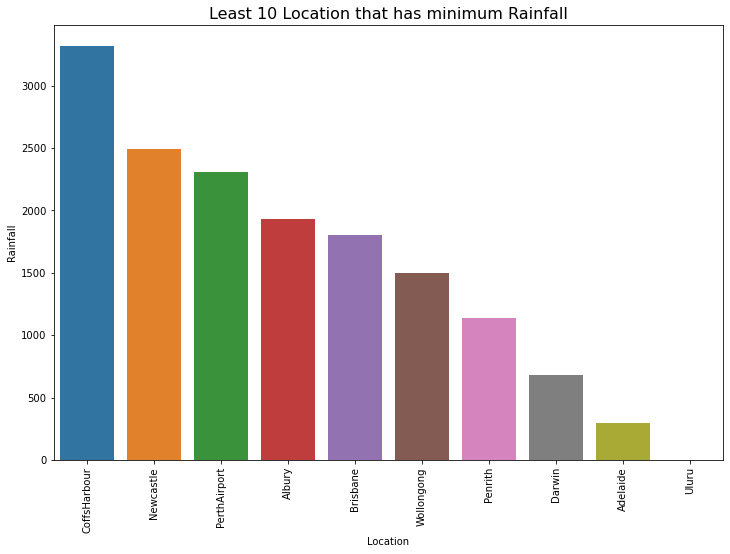

In [23]:
plt.figure(figsize=(12,8))
sns.barplot(x='Location',y='Rainfall',data=df1_rainfall.tail(10))
plt.title("Least 10 Location that has minimum Rainfall",fontsize=16)
plt.xticks(rotation=90)
plt.show()

From the above plot we see that all these 10 location have only less rainfall.

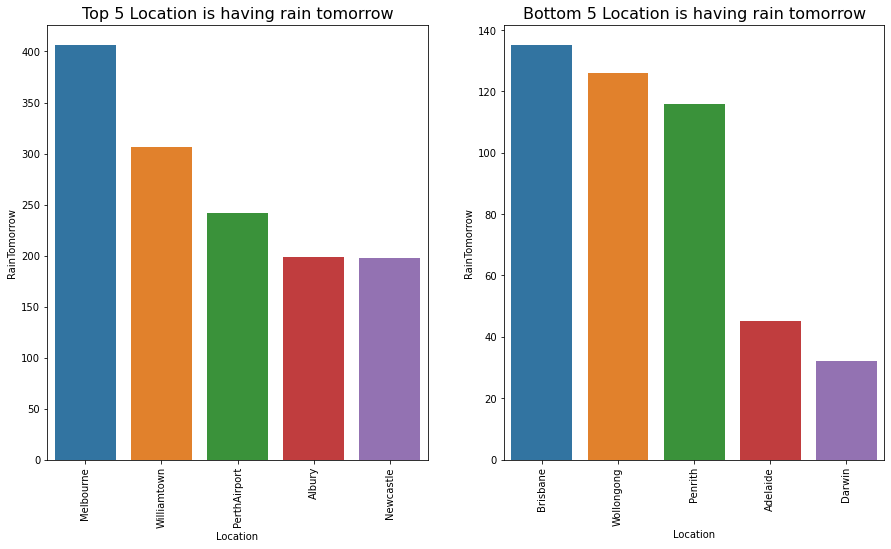

In [24]:
#checking top 5 and bottom 5 location that will have rain tomorrow
df2_rainfall=df_rainfall_prediction[df_rainfall_prediction['RainTomorrow']=='Yes']
df3_rainfall=df2_rainfall.groupby('Location')['RainTomorrow'].count()
df3_rainfall=df3_rainfall.reset_index()
df3_rainfall=df3_rainfall.sort_values(by=('RainTomorrow'),ascending=False)

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.barplot(x='Location',y='RainTomorrow',data=df3_rainfall.head(5))
plt.title("Top 5 Location is having rain tomorrow",fontsize=16)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x='Location',y='RainTomorrow',data=df3_rainfall.tail(5))
plt.title("Bottom 5 Location is having rain tomorrow",fontsize=16)
plt.xticks(rotation=90)
plt.show()

- From top 5 location, we see that Melbourne will have highest amount of rain tomorrow as compared to others.
- From bottom 5 location, we can see that all of them will be having less amount of rain tomorow.

<AxesSubplot:ylabel='Rainfall'>

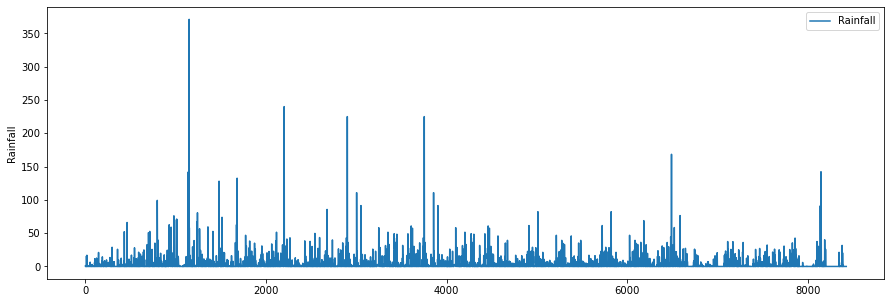

In [25]:
#checking lineplot for Rainfall
plt.figure(figsize=(15,5))
sns.lineplot(data=df_rainfall_prediction['Rainfall'],label='Rainfall')

We see that the flow is not increasing continuously.

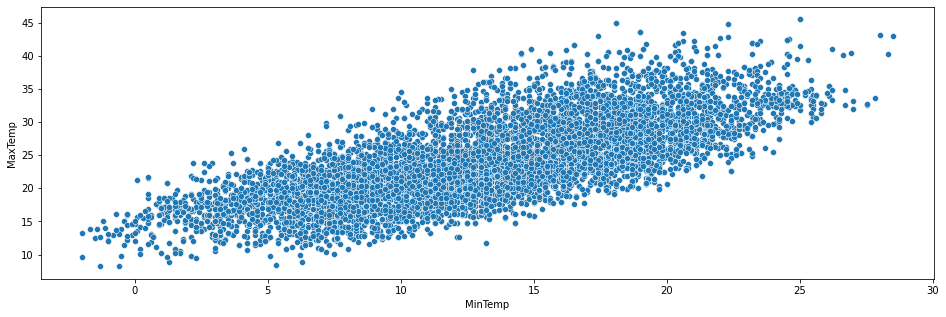

In [26]:
# Scatter plot for min and max temperatures
plt.figure(figsize=(16,5))
sns.scatterplot(data=df_rainfall_prediction, x='MinTemp', y='MaxTemp')
plt.show()

Different temperature shows linear relationship at different timespan.

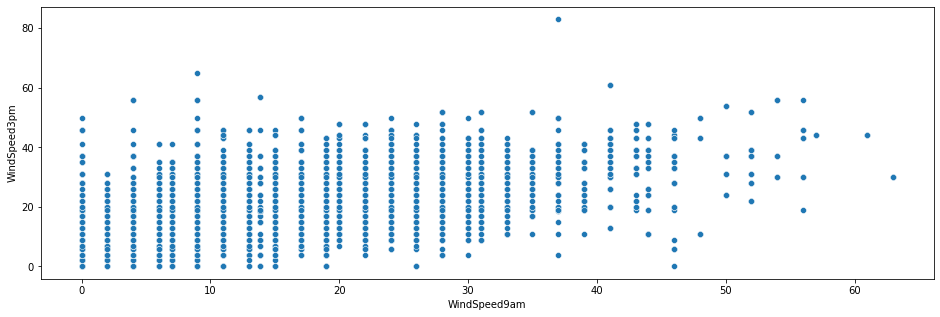

In [27]:
# Scatter plot for min and max temperatures
plt.figure(figsize=(16,5))
sns.scatterplot(data=df_rainfall_prediction, x='WindSpeed9am', y='WindSpeed3pm')
plt.show()

Windspeed not showing linear relationship at different timespan.

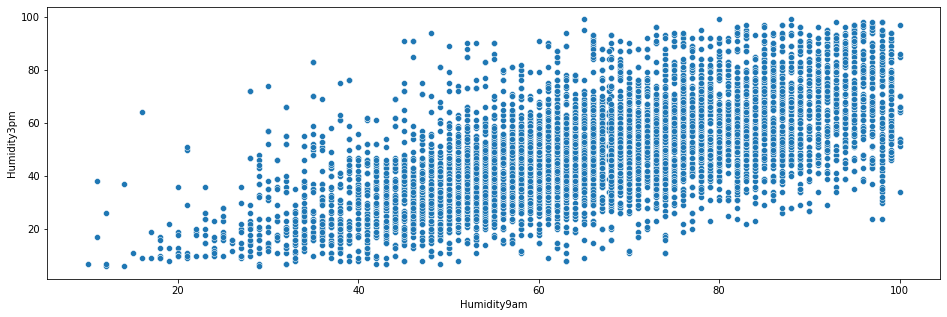

In [28]:
# Scatter plot for min and max temperatures
plt.figure(figsize=(16,5))
sns.scatterplot(data=df_rainfall_prediction, x='Humidity9am', y='Humidity3pm')
plt.show()

Humidity not showing linear relationship at different timespan.

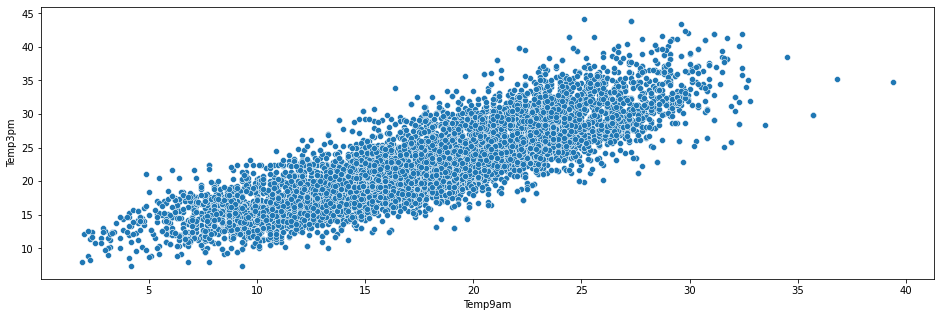

In [29]:
# Scatter plot for min and max temperatures
plt.figure(figsize=(16,5))
sns.scatterplot(data=df_rainfall_prediction, x='Temp9am', y='Temp3pm')
plt.show()

Temperature shows linear relationship at different timespan.

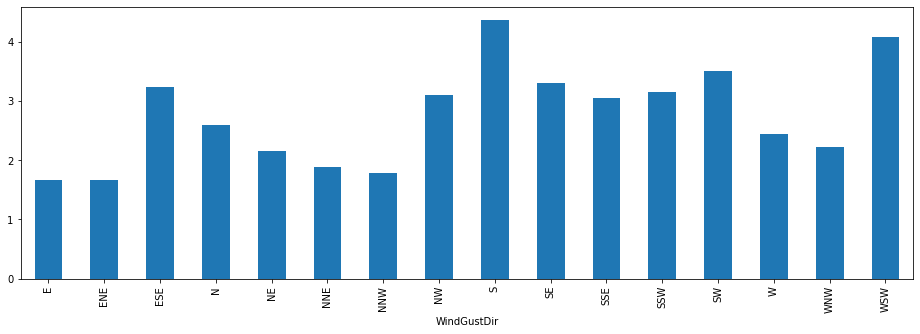

In [30]:
# Avg. rainfall based on wind direction
plt.figure(figsize=(16,5))
df_rainfall_prediction.groupby(by=['WindGustDir'])['Rainfall'].mean().plot(kind='bar')
plt.show()

In south direction, rainfall is more.

## Scaling the data

In [31]:
print(df_rainfall_prediction['Date'].unique())

['2008-12-01' '2008-12-02' '2008-12-03' ... '2013-06-06' '2013-06-07'
 '2013-06-08']


In [32]:
print(df_rainfall_prediction['Location'].unique())

['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']


In [33]:
print(df_rainfall_prediction['WindGustDir'].unique())

['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']


In [34]:
print(df_rainfall_prediction['WindDir9am'].unique())

['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'N' 'SSW' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']


In [35]:
print(df_rainfall_prediction['WindDir3pm'].unique())

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' 'NE']


In [36]:
print(df_rainfall_prediction['RainToday'].unique())

['No' 'Yes']


In [37]:
print(df_rainfall_prediction['RainTomorrow'].unique())

['No' 'Yes']


In [38]:
#using labelencoder to transform non-numerical state labels to numerical labels
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_rainfall_prediction['Date']=le.fit_transform(df_rainfall_prediction['Date'])
df_rainfall_prediction['Location']=le.fit_transform(df_rainfall_prediction['Location'])
df_rainfall_prediction['WindGustDir']=le.fit_transform(df_rainfall_prediction['WindGustDir'])
df_rainfall_prediction['WindDir9am']=le.fit_transform(df_rainfall_prediction['WindDir9am'])
df_rainfall_prediction['WindDir3pm']=le.fit_transform(df_rainfall_prediction['WindDir3pm'])
df_rainfall_prediction['RainToday']=le.fit_transform(df_rainfall_prediction['RainToday'])
df_rainfall_prediction['RainTomorrow']=le.fit_transform(df_rainfall_prediction['RainTomorrow'])

In [39]:
df_rainfall_prediction

Date  Location  MinTemp    MaxTemp  Rainfall  WindGustDir  \
0        0         1     13.4  22.900000       0.6           13   
1        1         1      7.4  25.100000       0.0           14   
2        2         1     12.9  25.700000       0.0           15   
3        3         1      9.2  28.000000       0.0            4   
4        4         1     17.5  32.300000       1.0           13   
...    ...       ...      ...        ...       ...          ...   
8420  2999         9      2.8  23.400000       0.0            0   
8421  3000         9      3.6  25.300000       0.0            6   
8422  3001         9      5.4  26.900000       0.0            3   
8423  3002         9      7.8  27.000000       0.0            9   
8424  3003         9     14.9  23.859976       0.0            3   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0         44.000000          13          14          20.0          24.0   
1         44.000000           6          15           4.0          22.0   
2         46.000000          13          15          19.0          26.0   
3         24.000000           9           0          11.0           9.0   
4         41.000000           1           7           7.0          20.0   
...             ...         ...         ...           ...           ...   
8420      31.000000           9           1          13.0          11.0   
8421      22.000000           9           3          13.0           9.0   
8422      37.000000           9          14           9.0           9.0   
8423      28.000000          10           3          13.0           7.0   
8424      40.174469           2           2          17.0          17.0   

      Humidity9am  Humidity3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0            71.0         22.0     16.9     21.8          0             0  
1            44.0         25.0     17.2     24.3          0             0  
2            38.0         30.0     21.0     23.2          0             0  
3            45.0         16.0     18.1     26.5          0             0  
4            82.0         33.0     17.8     29.7          0             0  
...           ...          ...      ...      ...        ...           ...  
8420         51.0         24.0     10.1     22.4          0             0  
8421         56.0         21.0     10.9     24.5          0             0  
8422         53.0         24.0     12.5     26.1          0             0  
8423         51.0         24.0     15.1     26.0          0             0  
8424         62.0         36.0     15.0     20.9          0             0  

[8425 rows x 17 columns]

In [40]:
print(df_rainfall_prediction['Date'].unique())

[   0    1    2 ... 1559 1560 1561]


In [41]:
print(df_rainfall_prediction['Location'].unique())

[ 1  3  6  7 10 11  5  2  0  8  4  9]


In [42]:
print(df_rainfall_prediction['WindGustDir'].unique())

[13 14 15  4  6  3  5 12  1 10  8  7  9  2  0 11]


In [43]:
print(df_rainfall_prediction['WindDir9am'].unique())

[13  6  9  1 12 10  8  4  3 11 15  2  0  7 14  5]


In [44]:
print(df_rainfall_prediction['WindDir3pm'].unique())

[14 15  0  7 13 10  2  1  6 11 12  9  3  8  5  4]


In [45]:
print(df_rainfall_prediction['RainToday'].unique())

[0 1]


In [46]:
print(df_rainfall_prediction['RainTomorrow'].unique())

[0 1]


## Multivariate Analysis:

In [47]:
#Checking Correlation
df_rainfall_prediction.corr()

Date  Location   MinTemp   MaxTemp  Rainfall  WindGustDir  \
Date           1.000000  0.475037  0.016931  0.102409  0.004945    -0.084552   
Location       0.475037  1.000000  0.116531  0.064268  0.007693    -0.035408   
MinTemp        0.016931  0.116531  1.000000  0.717522  0.087684    -0.145316   
MaxTemp        0.102409  0.064268  0.717522  1.000000 -0.087451    -0.224670   
Rainfall       0.004945  0.007693  0.087684 -0.087451  1.000000     0.038812   
WindGustDir   -0.084552 -0.035408 -0.145316 -0.224670  0.038812     1.000000   
WindGustSpeed -0.037361  0.231396  0.230058  0.139998  0.086000     0.016591   
WindDir9am    -0.012369 -0.027103 -0.041650 -0.214119  0.093821     0.403562   
WindDir3pm    -0.002895 -0.027736 -0.147166 -0.180622  0.038560     0.505799   
WindSpeed9am  -0.083943  0.221378  0.136872  0.013314  0.050631     0.025399   
WindSpeed3pm  -0.046362  0.231801  0.178349  0.088172  0.024791     0.094623   
Humidity9am    0.086328  0.005662 -0.130731 -0.390976  0.228800     0.036467   
Humidity3pm   -0.038345  0.055790  0.079048 -0.421879  0.235444     0.053567   
Temp9am        0.070703  0.118051  0.887119  0.866039 -0.007083    -0.176318   
Temp3pm        0.113734  0.060570  0.685520  0.974506 -0.090687    -0.238856   
RainToday     -0.011365  0.003071  0.064789 -0.224883  0.461106     0.125188   
RainTomorrow  -0.011228  0.002824  0.092942 -0.152886  0.220021     0.051832   

               WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  \
Date               -0.037361   -0.012369   -0.002895     -0.083943   
Location            0.231396   -0.027103   -0.027736      0.221378   
MinTemp             0.230058   -0.041650   -0.147166      0.136872   
MaxTemp             0.139998   -0.214119   -0.180622      0.013314   
Rainfall            0.086000    0.093821    0.038560      0.050631   
WindGustDir         0.016591    0.403562    0.505799      0.025399   
WindGustSpeed       1.000000   -0.072058    0.071235      0.600198   
WindDir9am         -0.072058    1.000000    0.249527      0.054272   
WindDir3pm          0.071235    0.249527    1.000000      0.025973   
WindSpeed9am        0.600198    0.054272    0.025973      1.000000   
WindSpeed3pm        0.634939    0.047116    0.068799      0.560660   
Humidity9am        -0.269593    0.025604   -0.010312     -0.358391   
Humidity3pm        -0.091860    0.124556   -0.012167     -0.110587   
Temp9am             0.202298   -0.103111   -0.165072      0.109798   
Temp3pm             0.102199   -0.221634   -0.194463     -0.002606   
RainToday           0.076822    0.157324    0.100125      0.035531   
RainTomorrow        0.190127    0.032860    0.008918      0.068285   

               WindSpeed3pm  Humidity9am  Humidity3pm   Temp9am   Temp3pm  \
Date              -0.046362     0.086328    -0.038345  0.070703  0.113734   
Location           0.231801     0.005662     0.055790  0.118051  0.060570   
MinTemp            0.178349    -0.130731     0.079048  0.887119  0.685520   
MaxTemp            0.088172    -0.390976    -0.421879  0.866039  0.974506   
Rainfall           0.024791     0.228800     0.235444 -0.007083 -0.090687   
WindGustDir        0.094623     0.036467     0.053567 -0.176318 -0.238856   
WindGustSpeed      0.634939    -0.269593    -0.091860  0.202298  0.102199   
WindDir9am         0.047116     0.025604     0.124556 -0.103111 -0.221634   
WindDir3pm         0.068799    -0.010312    -0.012167 -0.165072 -0.194463   
WindSpeed9am       0.560660    -0.358391    -0.110587  0.109798 -0.002606   
WindSpeed3pm       1.000000    -0.250953    -0.091004  0.184188  0.066087   
Humidity9am       -0.250953     1.000000     0.633291 -0.378344 -0.382401   
Humidity3pm       -0.091004     0.633291     1.000000 -0.130414 -0.491485   
Temp9am            0.184188    -0.378344    -0.130414  1.000000  0.834165   
Temp3pm            0.066087    -0.382401    -0.491485  0.834165  1.000000   
RainToday          0.015268     0.374007     0.359219 -0.097332 -0.234693   
RainTomo

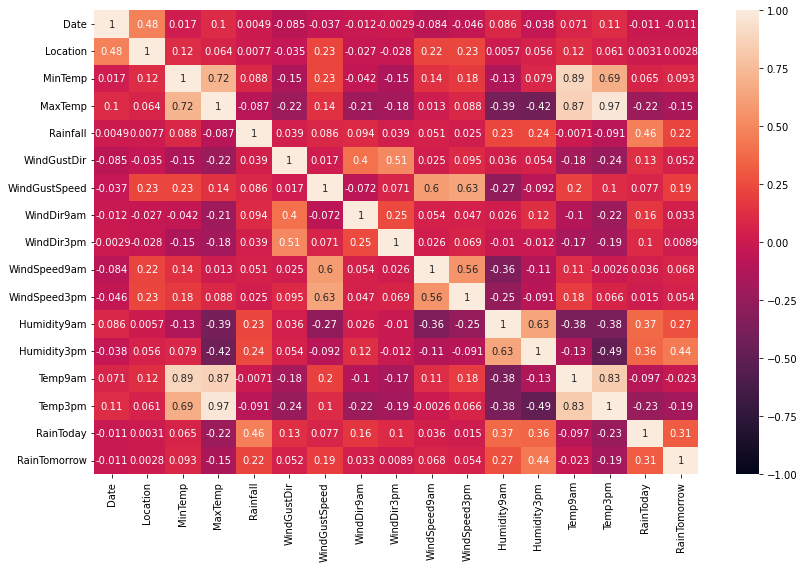

In [48]:
df_correlation = df_rainfall_prediction.corr()

plt.figure(figsize = (12,8))
sns.heatmap(df_correlation, vmin=-1, vmax= 1, annot=True)
plt.tight_layout()

We see that we have some columns that have good positive correlation and some have negative correlation which is good for model building.

#### Find out which columns are positively and negatively correlated with Rainfall target variable

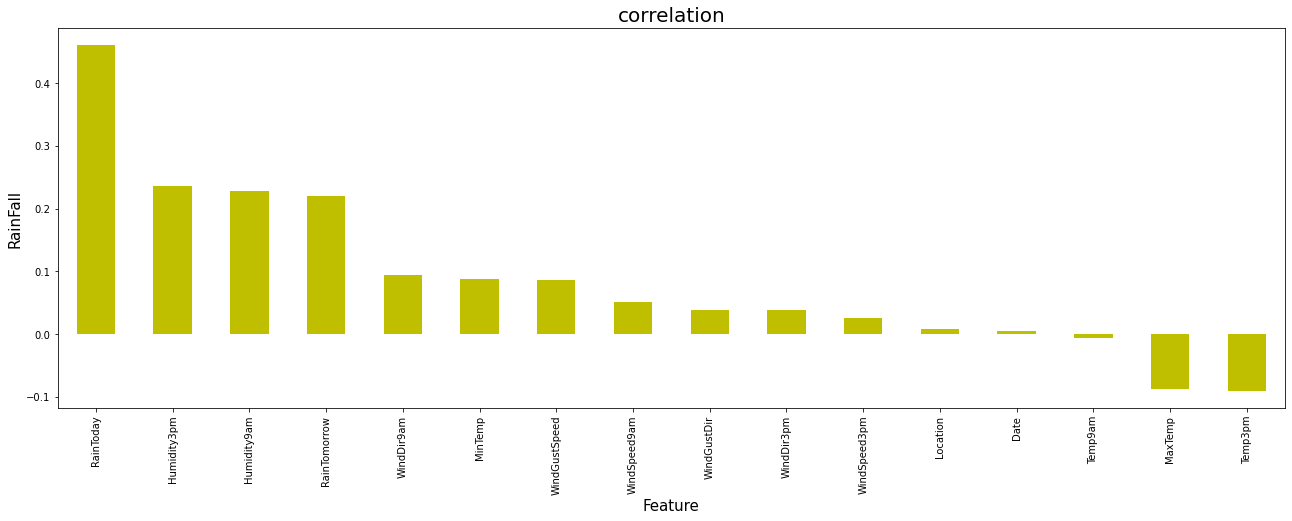

In [49]:
plt.figure(figsize=(22,7))
df_rainfall_prediction.corr()['Rainfall'].sort_values(ascending = False).drop(['Rainfall']).plot(kind = 'bar', color = 'y')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('RainFall', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

From above plot, we can see that Temp9am, Temp3pm and MaxTemp columns are negatively correlated with Rainfall target variable and rest of the columns are positively correlated with target variable.

#### Find out which columns are positively and negatively correlated with RainTomorrow target variable

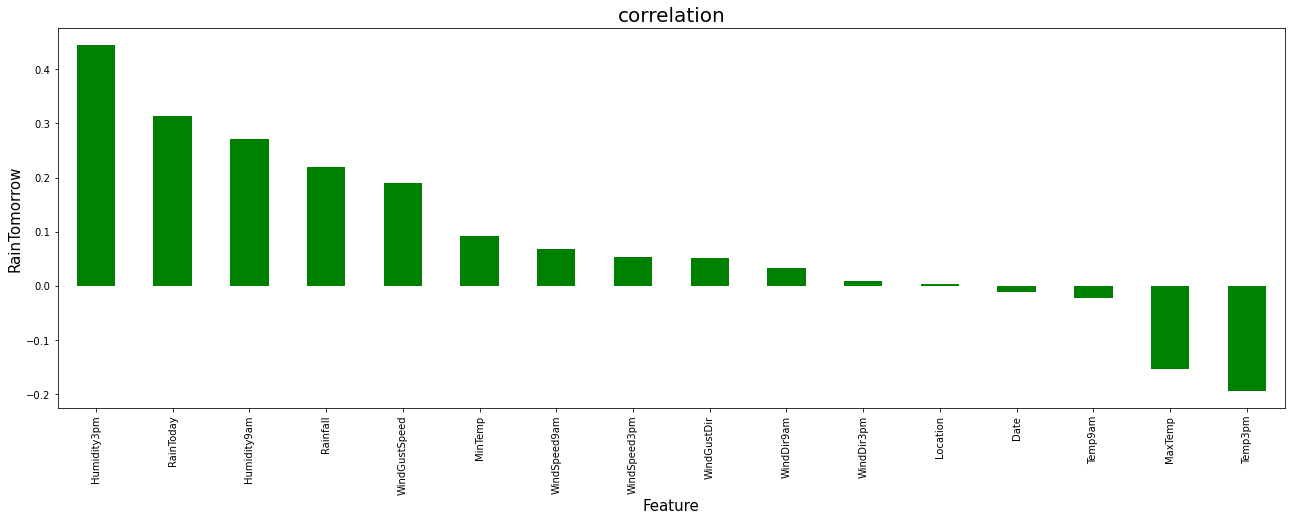

In [50]:
plt.figure(figsize=(22,7))
df_rainfall_prediction.corr()['RainTomorrow'].sort_values(ascending = False).drop(['RainTomorrow']).plot(kind = 'bar', color = 'g')
plt.xlabel('Feature', fontsize = 15)
plt.ylabel('RainTomorrow', fontsize = 15)
plt.title('correlation', fontsize = 20)
plt.show()

From above plot, we can see that Temp9am, Temp3pm, MaxTemp and Date columns are negatively correlated with RainTomorrow target variable and rest of the columns are positively correlated with target variable.

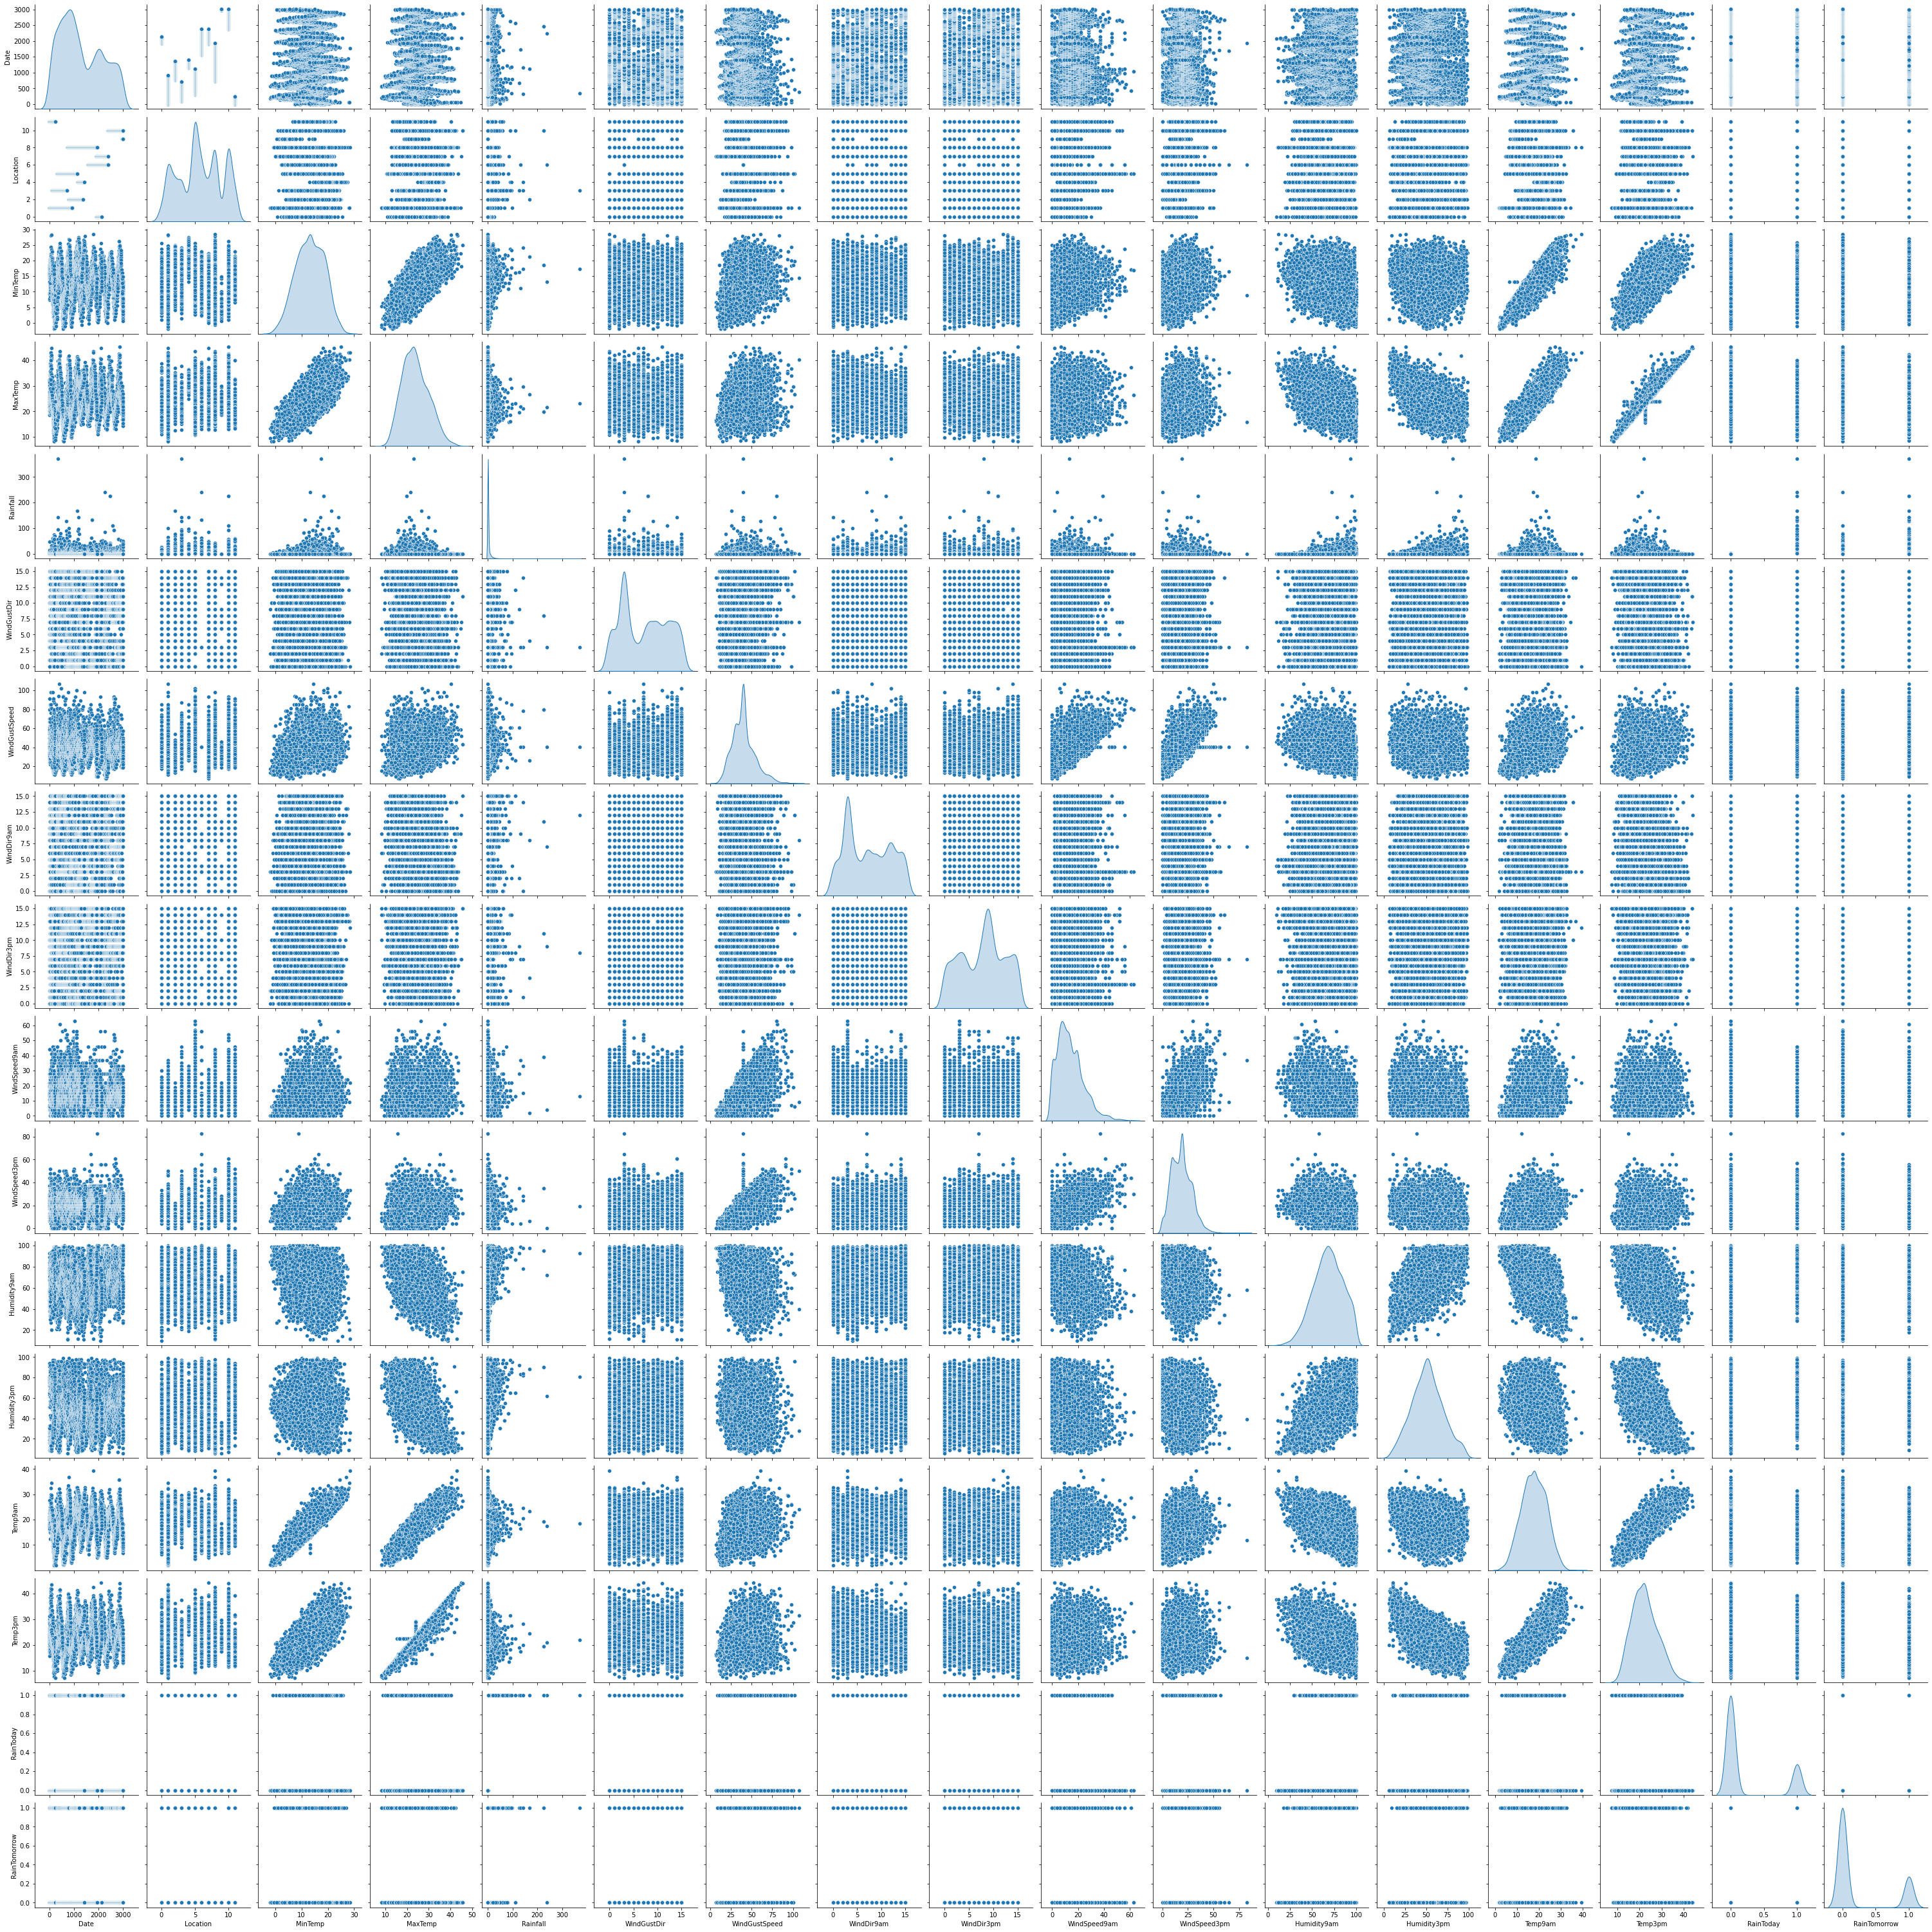

In [51]:
# Relation between all the variables
sns.pairplot(df_rainfall_prediction, diag_kind='kde')
plt.show()

Few variables are normally distributed and shows linear relationship with other variables.

## Preparing Data for Regression Model:


In [52]:
x = df_rainfall_prediction.drop(['Rainfall'],axis=1)
y = df_rainfall_prediction['Rainfall']

In [53]:
x

Date  Location  MinTemp    MaxTemp  WindGustDir  WindGustSpeed  \
0        0         1     13.4  22.900000           13      44.000000   
1        1         1      7.4  25.100000           14      44.000000   
2        2         1     12.9  25.700000           15      46.000000   
3        3         1      9.2  28.000000            4      24.000000   
4        4         1     17.5  32.300000           13      41.000000   
...    ...       ...      ...        ...          ...            ...   
8420  2999         9      2.8  23.400000            0      31.000000   
8421  3000         9      3.6  25.300000            6      22.000000   
8422  3001         9      5.4  26.900000            3      37.000000   
8423  3002         9      7.8  27.000000            9      28.000000   
8424  3003         9     14.9  23.859976            3      40.174469   

      WindDir9am  WindDir3pm  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0             13          14          20.0          24.0         71.0   
1              6          15           4.0          22.0         44.0   
2             13          15          19.0          26.0         38.0   
3              9           0          11.0           9.0         45.0   
4              1           7           7.0          20.0         82.0   
...          ...         ...           ...           ...          ...   
8420           9           1          13.0          11.0         51.0   
8421           9           3          13.0           9.0         56.0   
8422           9          14           9.0           9.0         53.0   
8423          10           3          13.0           7.0         51.0   
8424           2           2          17.0          17.0         62.0   

      Humidity3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0            22.0     16.9     21.8          0             0  
1            25.0     17.2     24.3          0             0  
2            30.0     21.0     23.2          0             0  
3            16.0     18.1     26.5          0             0  
4            33.0     17.8     29.7          0             0  
...           ...      ...      ...        ...           ...  
8420         24.0     10.1     22.4          0             0  
8421         21.0     10.9     24.5          0             0  
8422         24.0     12.5     26.1          0             0  
8423         24.0     15.1     26.0          0             0  
8424         36.0     15.0     20.9          0             0  

[8425 rows x 16 columns]

In [54]:
y_new=np.log(y)
y_new=y_new.replace([np.inf,-np.inf],np.nan)
y_new=y_new.fillna(0)

Text(0.5, 1.0, 'After applying log')

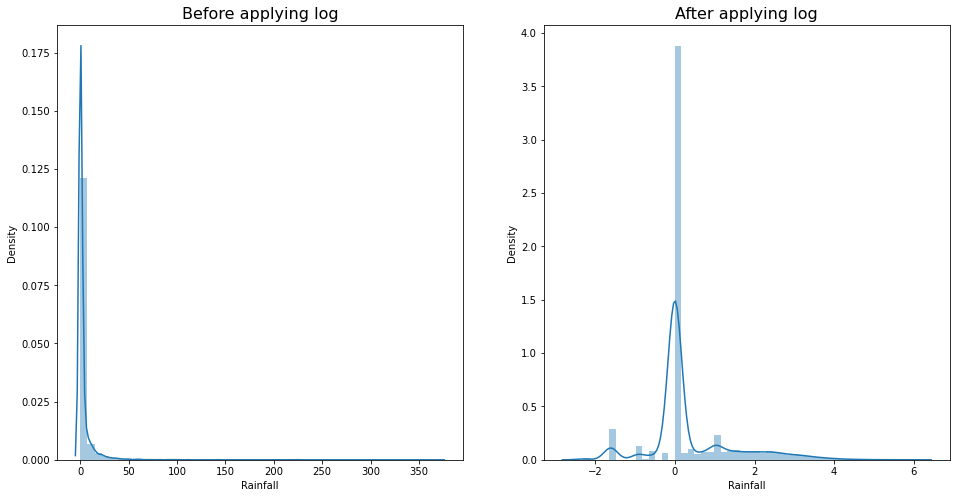

In [55]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
sns.distplot(y)
plt.title("Before applying log",fontsize=16)
plt.subplot(1,2,2)
sns.distplot(y_new)
plt.title("After applying log",fontsize=16)

The target column 'Rainfall' is having very large values so we did log transformation and secondly, the target column is also right skewed so according to rule if our target column is right skewed only then we can apply log tansformation on target column. At the time of prediction, we will reverse it though.

## Feature Scaling: 

In [56]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x)
x_new=pd.DataFrame(x_new,columns=x.columns)

## Checking skewness:

In [57]:
x_new.skew()

Date             0.386560
Location        -0.050456
MinTemp         -0.089989
MaxTemp          0.380654
WindGustDir      0.119640
WindGustSpeed    0.757000
WindDir9am       0.172792
WindDir3pm      -0.119847
WindSpeed9am     0.960591
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Temp9am         -0.014748
Temp3pm          0.397331
RainToday        1.242362
RainTomorrow     1.241588
dtype: float64

## Removing skewness:

In [58]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x_new,method='yeo-johnson')
x_new=pd.DataFrame(x_new,columns=x.columns)

In [59]:
#checking skewness after removal
x_new.skew()

Date             0.066901
Location        -0.014157
MinTemp         -0.007731
MaxTemp          0.013712
WindGustDir      0.034697
WindGustSpeed   -0.003308
WindDir9am       0.040558
WindDir3pm      -0.001637
WindSpeed9am     0.067120
WindSpeed3pm     0.040136
Humidity9am     -0.032933
Humidity3pm      0.003454
Temp9am          0.000620
Temp3pm          0.014399
RainToday        1.242362
RainTomorrow     1.241588
dtype: float64

Now we can see that skewness is removed.

## Checking outliers using boxplot:

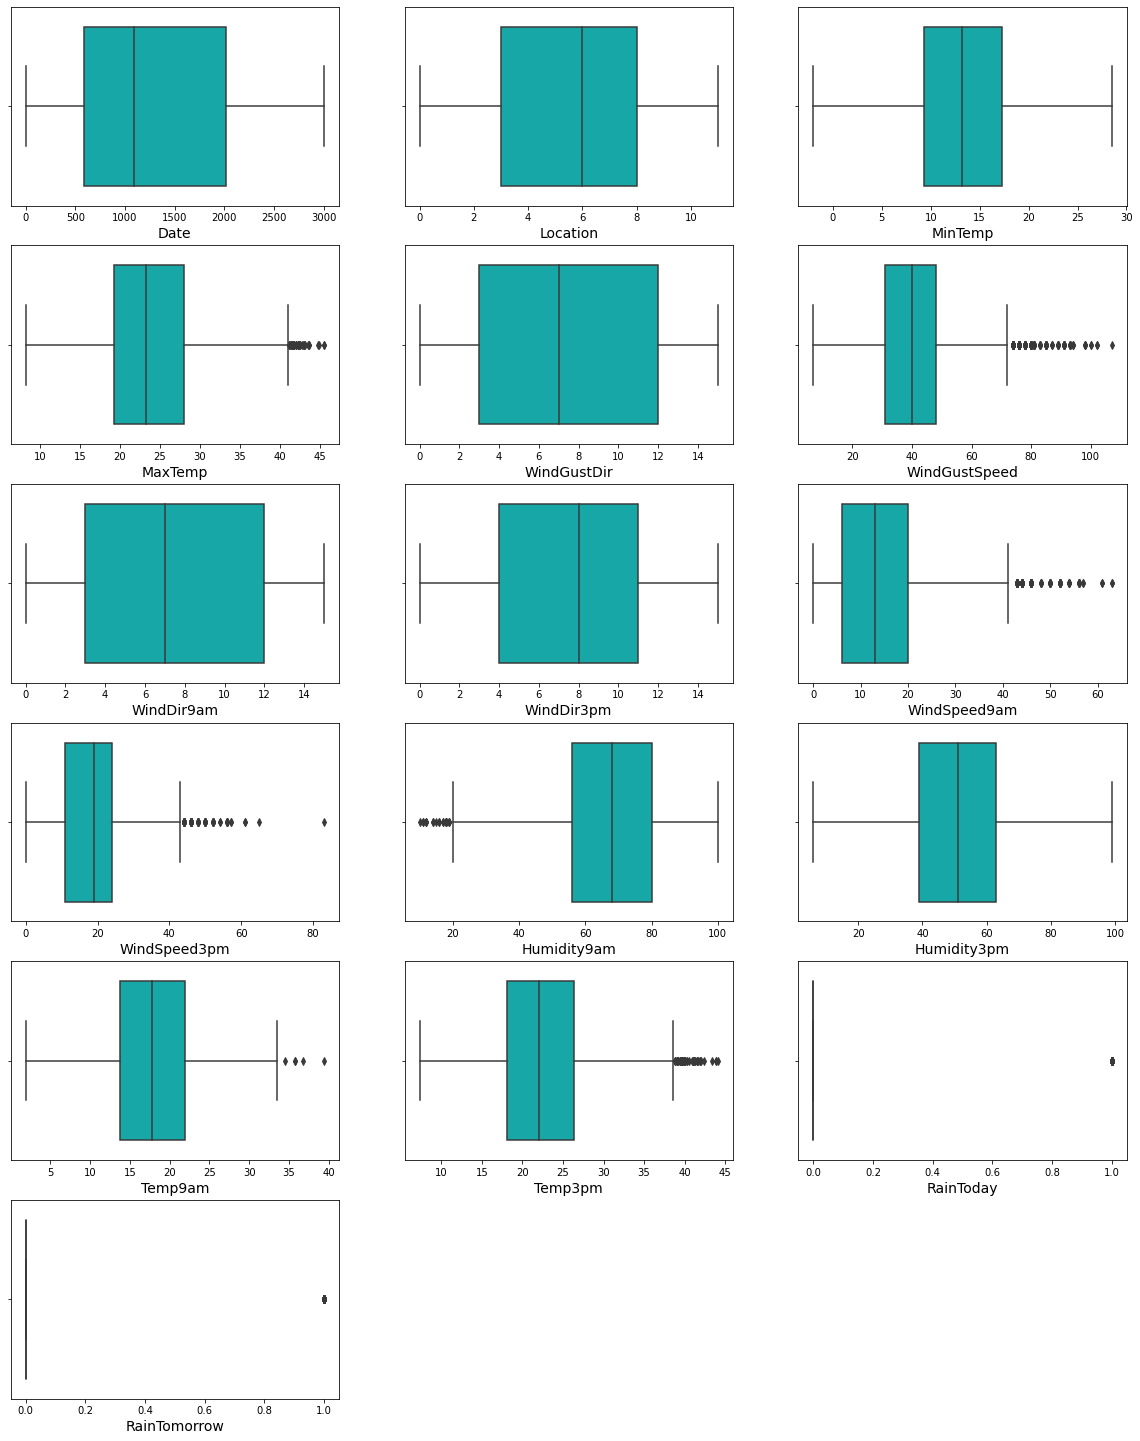

In [61]:
plt.figure(figsize = (20,30))
plot_number = 1

for i in x:
    if plot_number <= 18: 
        plt.subplot(7,3,plot_number)
        sns.boxplot(x[i], color = 'c')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()

We see that there are outliers present in some of the columns.

## Remove outliers:

In [62]:
#using percentile method to remove the outliers
for col in x.columns:
    percentile=x[col].quantile([0.01,0.98]).values
    x[col][x[col]<=percentile[0]]=percentile[0]
    x[col][x[col]>=percentile[1]]=percentile[1]

Here we have removed the outliers with the percentile method.

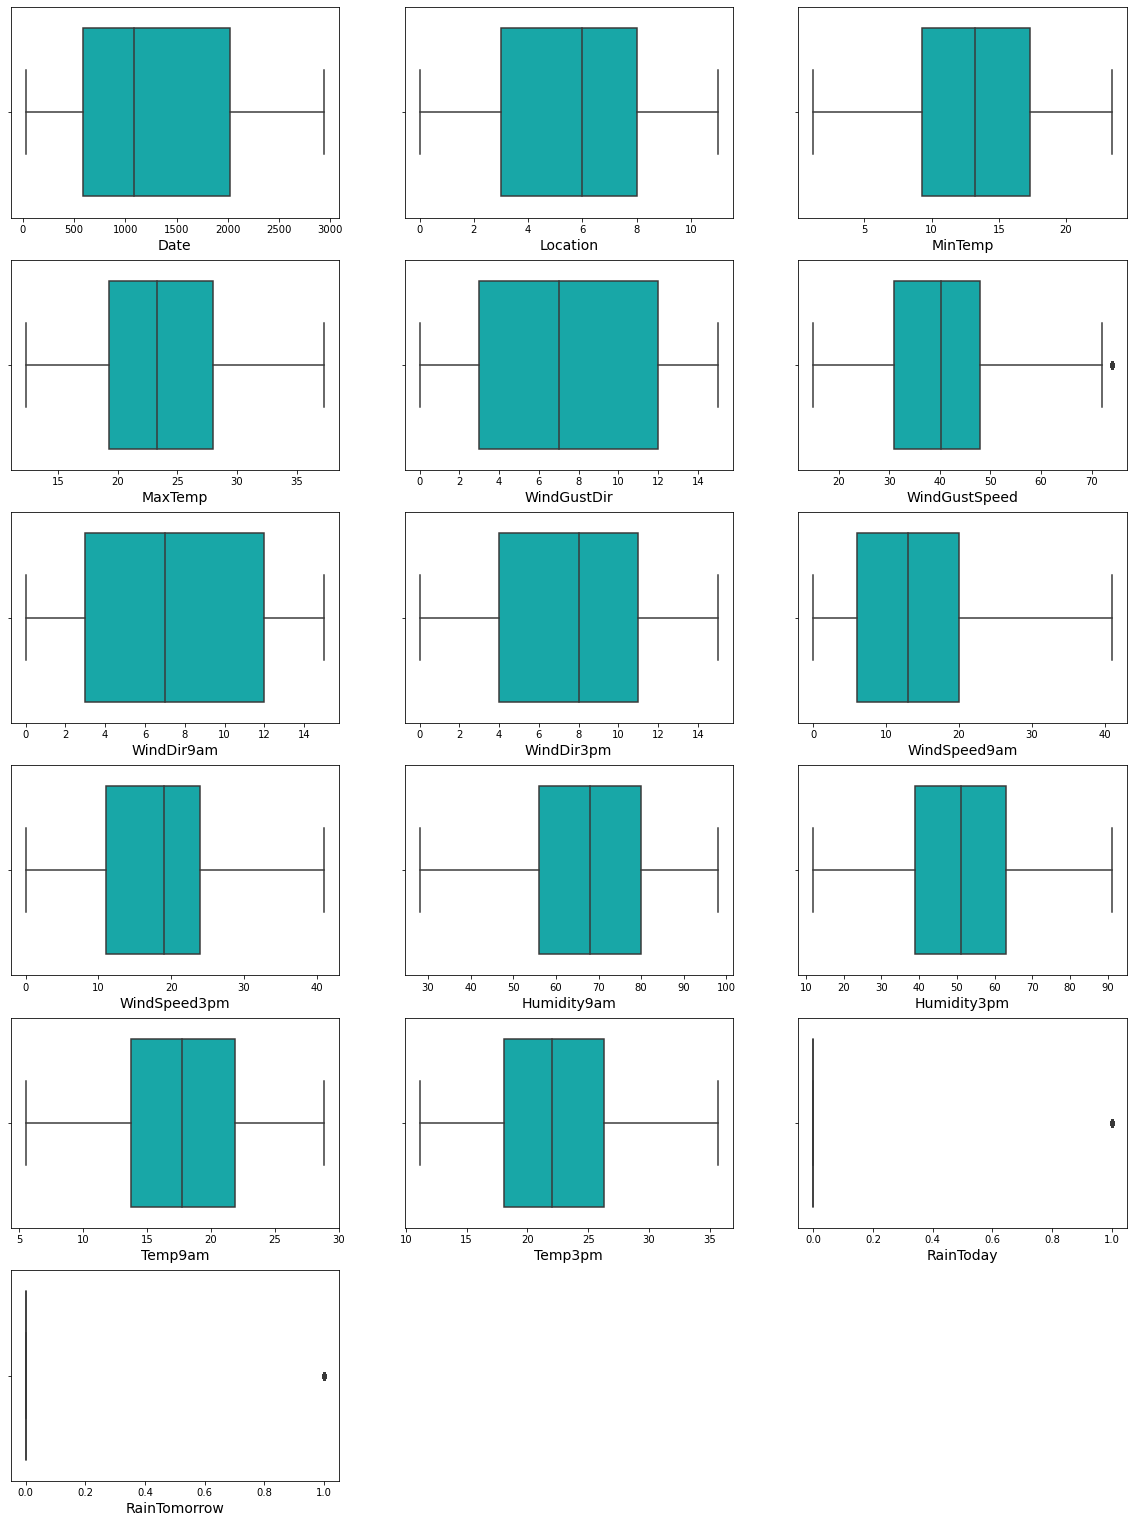

In [63]:
#checking outliers after removal
plt.figure(figsize = (20,55))
plot_number = 1

for i in x:
    if plot_number <= 24: 
        plt.subplot(12,3,plot_number)
        sns.boxplot(x[i], color = 'c')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()

we have successfully removed the outliers.

## Training Multiple models:

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import scikitplot as skplt
from yellowbrick.classifier.rocauc import roc_auc

In [65]:
models_regression={
    "LinearRegression":LinearRegression(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "RandomForestRegressor":RandomForestRegressor(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "SupportVectorRegression":SVR()
}

## Finding best Random State

In [69]:
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size=.22, random_state=i)
    dtr= DecisionTreeRegressor()
    dtr.fit(x_train, y_train)
    pred_dtr = dtr.predict(x_test)
    acc=r2_score(y_test, pred_dtr)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.5989622884265552 on Random_state  165


In [70]:
x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size=.20, random_state=165)

## Finding the best model:

-------------------- LinearRegression --------------------
Score 0.6043179055469776
MEAN_SQUARE_ERROR 128.33869639100695
MEAN_ABSOLUTE_ERROR 2.161773378184605
RMSE 11.328667017394718
R2_SCORE 0.6043179055469776


MODEL PERFORMANCE CURVE


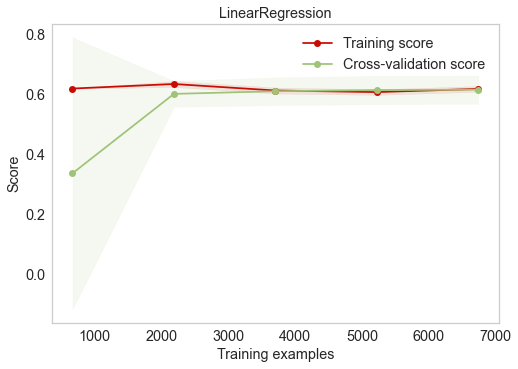

-------------------- GradientBoostingRegressor --------------------
Score 0.6515514836092043
MEAN_SQUARE_ERROR 122.98688240939825
MEAN_ABSOLUTE_ERROR 2.0421600995085174
RMSE 11.089945103984881
R2_SCORE 0.6515514836092043


MODEL PERFORMANCE CURVE


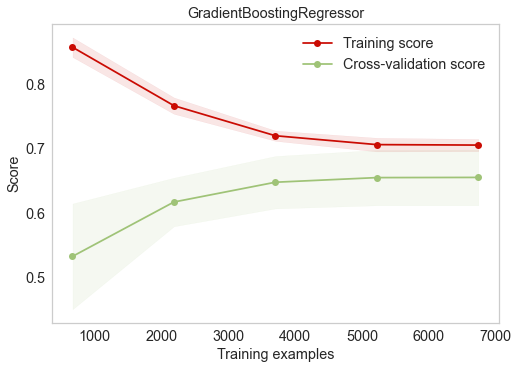

-------------------- RandomForestRegressor --------------------
Score 0.7364415838097352
MEAN_SQUARE_ERROR 113.94124992512914
MEAN_ABSOLUTE_ERROR 1.7606778202119482
RMSE 10.674326673150356
R2_SCORE 0.7364415838097352


MODEL PERFORMANCE CURVE


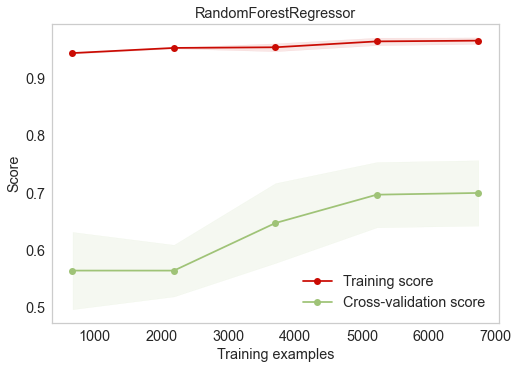

-------------------- DecisionTreeRegressor --------------------
Score 0.5397170275698606
MEAN_SQUARE_ERROR 144.39950380722206
MEAN_ABSOLUTE_ERROR 2.0410235630423315
RMSE 12.0166344625782
R2_SCORE 0.5397170275698606


MODEL PERFORMANCE CURVE


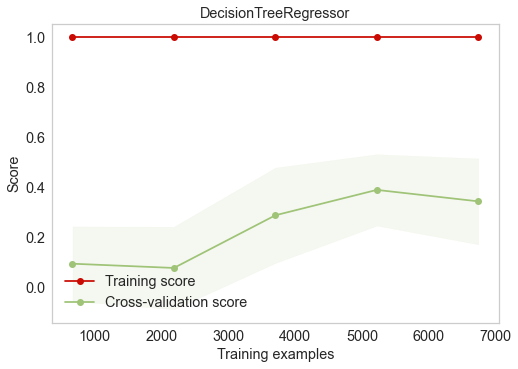

-------------------- SupportVectorRegression --------------------
Score 0.6382423008927568
MEAN_SQUARE_ERROR 122.43152249359541
MEAN_ABSOLUTE_ERROR 2.0272733416254374
RMSE 11.06487787974162
R2_SCORE 0.6382423008927568


MODEL PERFORMANCE CURVE


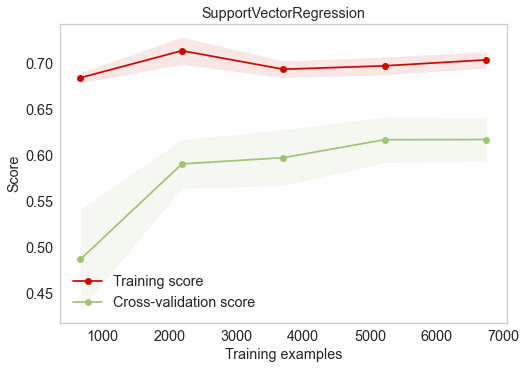

In [71]:
cvs=[]
Model=[]
score=[]
R2_score=[]
Mse=[]
Mae=[]
rmse=[]
Rmse=[]
for name,model in models_regression.items():
    print("-"*20,name,"-"*20)
    Model.append(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    cs=cross_val_score(model,x_new,y_new,cv=5,scoring='r2').mean()
    cvs.append(cs*100)
    mse=mean_squared_error(np.exp(y_test),np.exp(y_pred))
    Mse.append(mse)
    sc=model.score(x_test,y_test)
    score.append(sc)
    print("Score",sc)
    print("MEAN_SQUARE_ERROR",mse)
    mae=mean_absolute_error(np.exp(y_test),np.exp(y_pred))
    Mae.append(mae)
    print("MEAN_ABSOLUTE_ERROR",mae)
    rmse=np.sqrt(mse)
    Rmse.append(rmse)
    print("RMSE",rmse)
    print("R2_SCORE",r2_score(y_test,y_pred))
    print("\n")
    print("MODEL PERFORMANCE CURVE")
    skplt.estimators.plot_learning_curve(model,x_new,y_new,cv=5,scoring='r2',text_fontsize='large',title=name)
    plt.show()
    

In [72]:
#making a dataframe of the models
models_csv=pd.DataFrame({
    'models':Model,
    "Score":score,
    'Cross_val_score':cvs,
    'Msa':Mse,
    'Mae':Mae,
    'RMSE':Rmse
})

models_csv

models     Score  Cross_val_score         Msa       Mae  \
0           LinearRegression  0.604318        61.455973  128.338696  2.161773   
1  GradientBoostingRegressor  0.651551        65.497659  122.986882  2.042160   
2      RandomForestRegressor  0.736442        69.948917  113.941250  1.760678   
3      DecisionTreeRegressor  0.539717        34.602115  144.399504  2.041024   
4    SupportVectorRegression  0.638242        61.730025  122.431522  2.027273   

        RMSE  
0  11.328667  
1  11.089945  
2  10.674327  
3  12.016634  
4  11.064878

## We are selecting Random Forest Regressor as our final model since it has less Mae value and less RMSE.

## Hyper parameter tuning on the best ML Model:

In [73]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [74]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [75]:
param_class={
 'criterion': ['squared_error','absolute_error', 'poisson'],
 'max_depth': [None,1,2,3],
 'max_features': ['sqrt','log2', None],
 'max_samples': [None,1,2]}

In [76]:
#using the Grid Search CV method for hyper parameter tuning the best model.
grid=GridSearchCV(estimator=rfr,param_grid=param_class,n_jobs=-1,cv=5)

In [77]:
#training the Grid Search CV with the list of parameters it should check for best possible outcomes.
grid.fit(x_new,y_new)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'absolute_error',
                                       'poisson'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [None, 1, 2]})

In [78]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'log2',
 'max_samples': None}

In [79]:
grid.best_score_

0.710584193513041

## Final Model Learning Curve:

In [81]:
rfrr=RandomForestRegressor(
 criterion= 'squared_error',
 max_depth= None,
 max_features= 'log2',
 max_samples= None)

<AxesSubplot:title={'center':'Final Model Learnig Curve'}, xlabel='Training examples', ylabel='Score'>

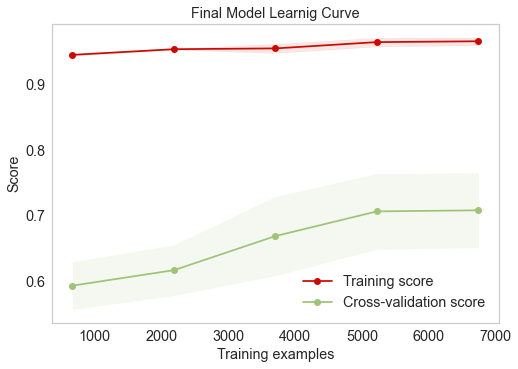

In [82]:
skplt.estimators.plot_learning_curve(rfrr,x_new,y_new,cv=5,scoring='r2',text_fontsize='large',title='Final Model Learnig Curve')

## Final model metrics:

In [83]:
rfrr.fit(x_train,y_train)
pred_rfrr=rfrr.predict(x_test)

print("Mean squared error",mean_squared_error(y_test,pred_rfrr))
print("Mean absolute error",mean_absolute_error(y_test,pred_rfrr))
print("R2 Score",r2_score(y_test,pred_rfrr))
print("Model score",rfrr.score(x_test,y_test))

Mean squared error 0.29700496824814243
Mean absolute error 0.3157314559069964
R2 Score 0.7376910720916928
Model score 0.7376910720916928


## The R2 score of Final Regression model is 73.76%.

## Saving and loading the model:

In [84]:
import joblib
joblib.dump(grid,"Final_model_Regression_Rainfall.obj")
model=joblib.load('Final_model_Regression_Rainfall.obj')

In [85]:
pred=model.predict(x_test)
np.exp(pred)

array([0.99097881, 0.24537071, 1.06359572, ..., 0.86673136, 0.98403444,
       1.        ])

## Preparing Data for Classification Model:

In [86]:
x=df_rainfall_prediction.drop(['RainTomorrow'],axis=1)
y=df_rainfall_prediction['RainTomorrow']

## Checking outliers:

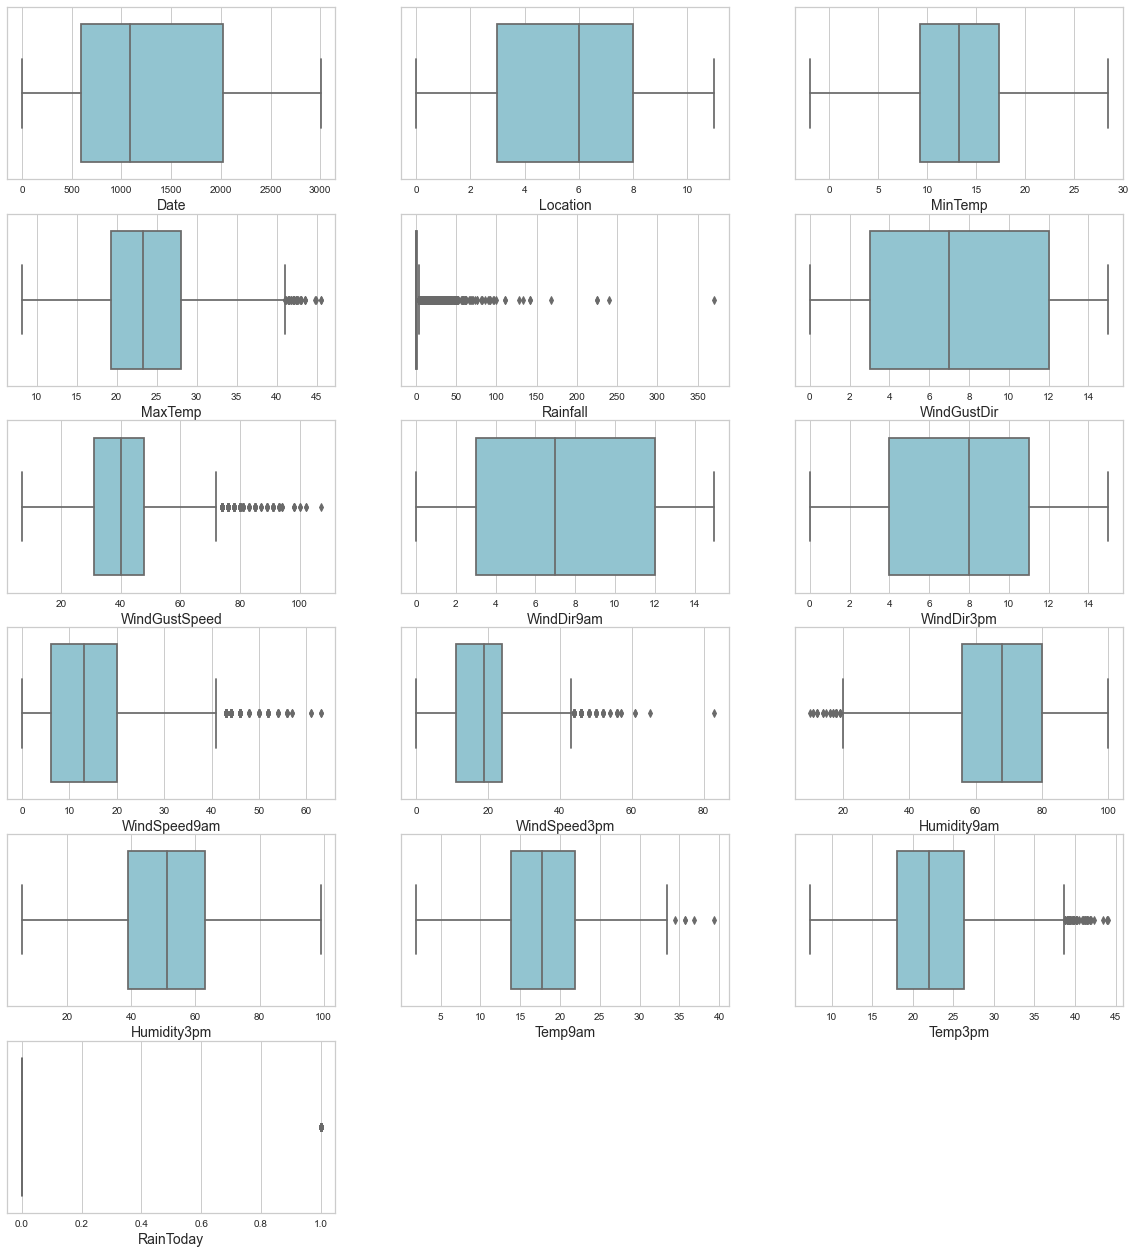

In [87]:
plt.figure(figsize = (20,45))
plot_number = 1

for i in x:
    if plot_number <= 18: 
        plt.subplot(12,3,plot_number)
        sns.boxplot(x[i], color = 'c')
        plt.xlabel(i,fontsize=14)
        
    plot_number += 1
plt.show()

We see that there are outliers present in some columns.

## Remove outliers:

In [88]:
#using percentile method to remove the outliers
for col in x.columns:
    percentile=x[col].quantile([0.01,0.98]).values
    x[col][x[col]<=percentile[0]]=percentile[0]
    x[col][x[col]>=percentile[1]]=percentile[1]

Here we have removed outliers with the percentile method.

## Resolving the class imbalance issue in the target column using SMOTE method:

In [89]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=98)
x_res,y_res=smote.fit_resample(x,y)
x_new=pd.DataFrame(x_res,columns=x.columns)
y_new=pd.DataFrame(y_res,columns=['RainTomorrow'])

Text(0.5, 1.0, 'Balanced Data')

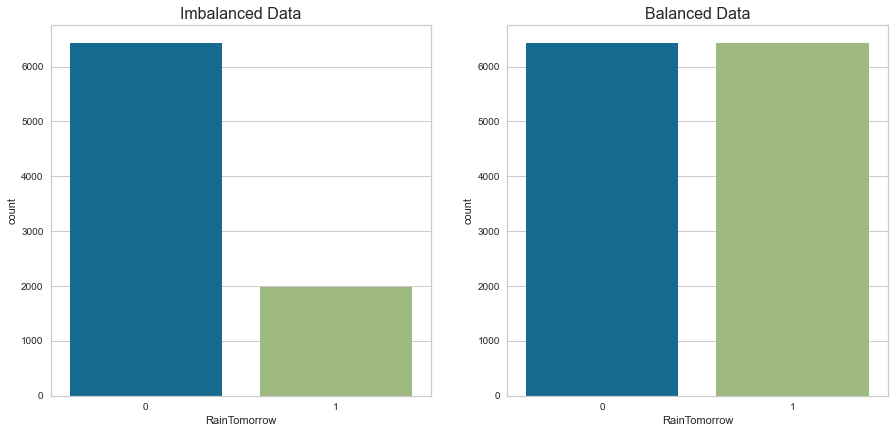

In [90]:
plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
sns.countplot(y)
plt.title("Imbalanced Data",fontsize=16)
plt.subplot(2,2,2)
sns.countplot(y_new['RainTomorrow'])
plt.title("Balanced Data",fontsize=16)

Data has been balanced so now our model can predict every class with good accuracy.

In [91]:
#checking value counts of target column before balancing
df_rainfall_prediction['RainTomorrow'].value_counts()

0    6434
1    1991
Name: RainTomorrow, dtype: int64

In [92]:
#target coulumn value counts after balancing the data
y_new.value_counts()

RainTomorrow
0               6434
1               6434
dtype: int64

 In the above cell, we can see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the classification Machine Learning model does not get biased towards one category.

## Checking skewness:

In [93]:
x_new.skew()

Date             0.395856
Location         0.003509
MinTemp         -0.128892
MaxTemp          0.331655
Rainfall         2.516092
WindGustDir      0.109829
WindGustSpeed    0.477742
WindDir9am       0.183993
WindDir3pm      -0.112263
WindSpeed9am     0.675024
WindSpeed3pm     0.236940
Humidity9am     -0.376776
Humidity3pm     -0.098982
Temp9am         -0.023574
Temp3pm          0.349318
RainToday        1.042641
dtype: float64

We see that there is skewed data present, so we will be removing it now.

In [94]:
#removing skewness
x_new=power_transform(x_new,method='yeo-johnson')
x_new=pd.DataFrame(x_new,columns=x.columns)

In [95]:
#checking skewness after removal
x_new.skew()

Date            -0.158282
Location        -0.164835
MinTemp         -0.116609
MaxTemp         -0.015357
Rainfall         0.521312
WindGustDir     -0.175526
WindGustSpeed   -0.010474
WindDir9am      -0.138485
WindDir3pm      -0.224553
WindSpeed9am    -0.102386
WindSpeed3pm    -0.090554
Humidity9am     -0.104019
Humidity3pm     -0.082708
Temp9am         -0.066012
Temp3pm         -0.015694
RainToday        1.042641
dtype: float64

Not entirely, but we removed skewness upto certain level.

## Feature Scaling:

In [96]:
x_new=scaler.fit_transform(x_new)
x_new=pd.DataFrame(x_new,columns=x.columns)

## Training multiple models:

In [97]:
models_classification={
    "AdaBoostClassifier":AdaBoostClassifier(),
    "GradientBoostingClassifier":GradientBoostingClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "SupportVectorClassifier":SVC()
}

## Finding Best Random State

In [98]:
maxAccuracy = 0
maxRandomState = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x_new,y_new, test_size=.20, random_state=i)
    gbc_= GradientBoostingClassifier()
    gbc_.fit(x_train, y_train)
    pred_ada = gbc_.predict(x_test)
    acc=accuracy_score(y_test,pred_ada)
    if acc>maxAccuracy:
        maxAccuracy=acc
        maxRandomState=i
print("Best accuracy is ",maxAccuracy, "on Random_state ", maxRandomState)

Best accuracy is  0.8535353535353535 on Random_state  36


In [99]:
#splitting the train test data
x_train,x_test,y_train,y_test=train_test_split(x_new,y_new,test_size=.20,random_state=36)

## Finding the best model:

---------------------- AdaBoostClassifier --------------------------
Accuracy_Score 0.818958818958819
SCORE 0.818958818958819
Confusion metrics
[[1078  217]
 [ 249 1030]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.81      0.83      0.82      1295
           1       0.83      0.81      0.82      1279

    accuracy                           0.82      2574
   macro avg       0.82      0.82      0.82      2574
weighted avg       0.82      0.82      0.82      2574

Cross_Val_Score 0.6499914086000367
ROC AUC CURVE


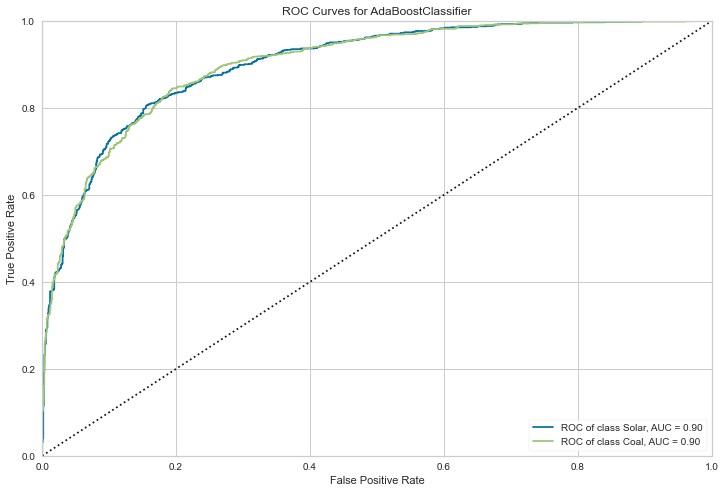

MODEL LEARNING CURVE


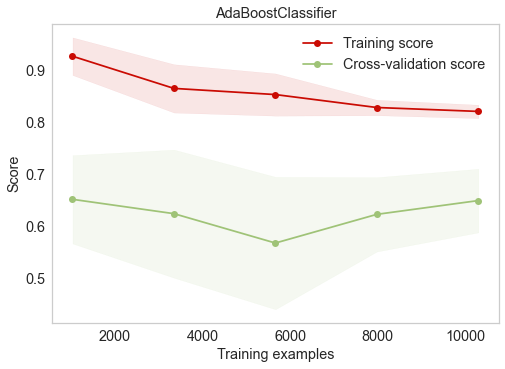

---------------------- GradientBoostingClassifier --------------------------
Accuracy_Score 0.8535353535353535
SCORE 0.8535353535353535
Confusion metrics
[[1119  176]
 [ 201 1078]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1295
           1       0.86      0.84      0.85      1279

    accuracy                           0.85      2574
   macro avg       0.85      0.85      0.85      2574
weighted avg       0.85      0.85      0.85      2574

Cross_Val_Score 0.6474246485906028
ROC AUC CURVE


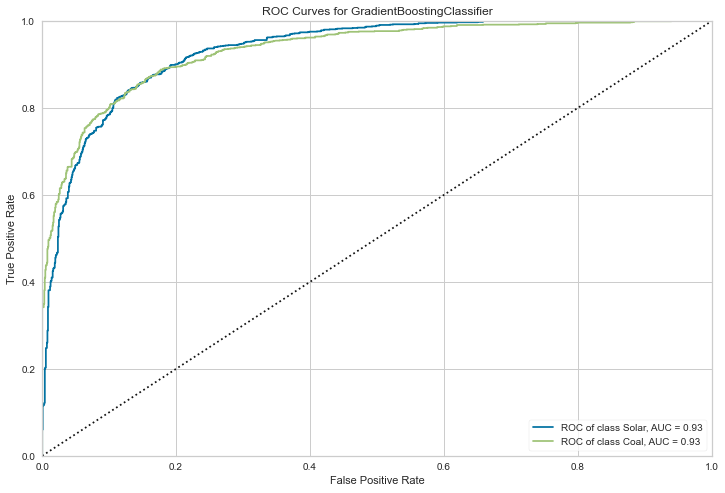

MODEL LEARNING CURVE


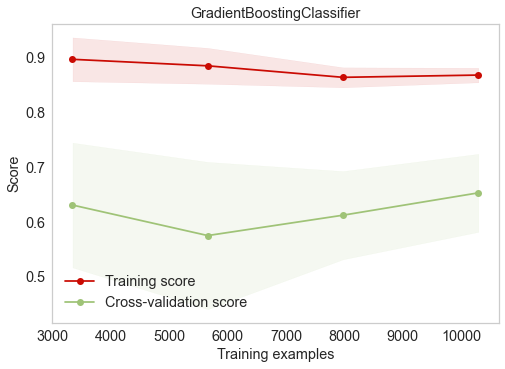

---------------------- RandomForestClassifier --------------------------
Accuracy_Score 0.9405594405594405
SCORE 0.9405594405594405
Confusion metrics
[[1219   76]
 [  77 1202]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1295
           1       0.94      0.94      0.94      1279

    accuracy                           0.94      2574
   macro avg       0.94      0.94      0.94      2574
weighted avg       0.94      0.94      0.94      2574

Cross_Val_Score 0.7575444721966291
ROC AUC CURVE


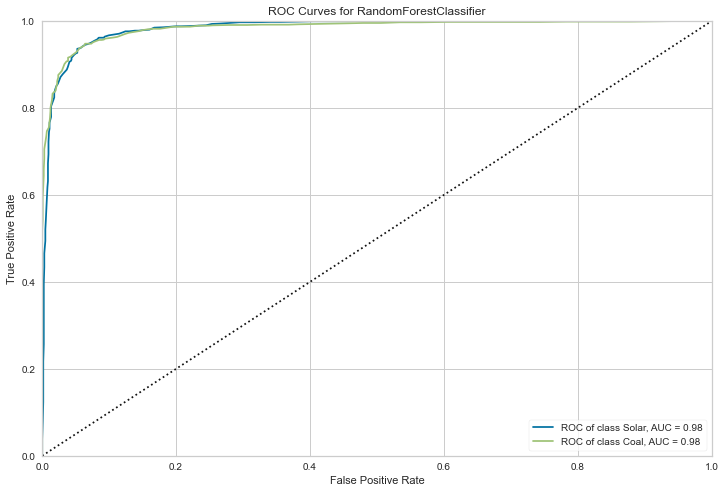

MODEL LEARNING CURVE


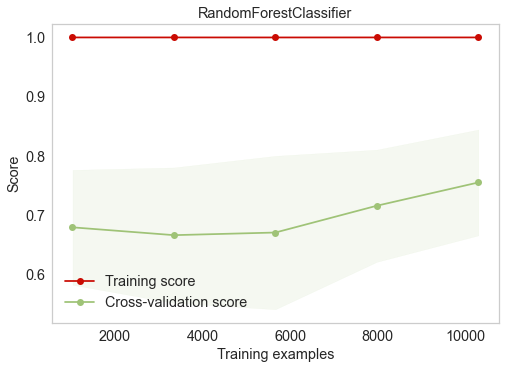

---------------------- DecisionTreeClassifier --------------------------
Accuracy_Score 0.8912198912198912
SCORE 0.8912198912198912
Confusion metrics
[[1152  143]
 [ 137 1142]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1295
           1       0.89      0.89      0.89      1279

    accuracy                           0.89      2574
   macro avg       0.89      0.89      0.89      2574
weighted avg       0.89      0.89      0.89      2574

Cross_Val_Score 0.7117662015835353
ROC AUC CURVE


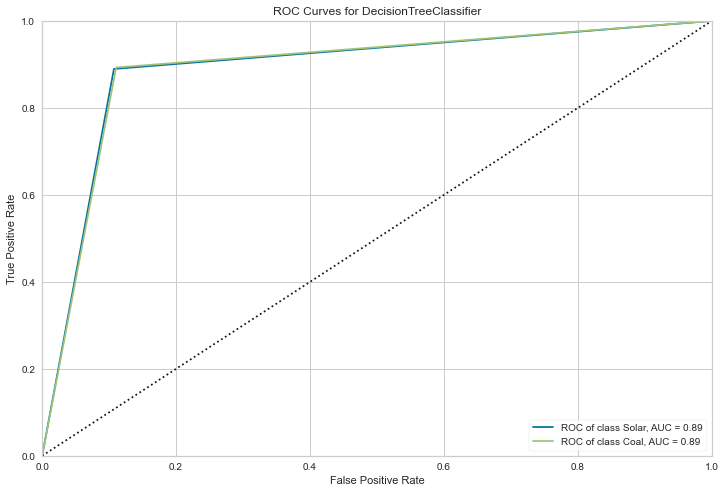

MODEL LEARNING CURVE


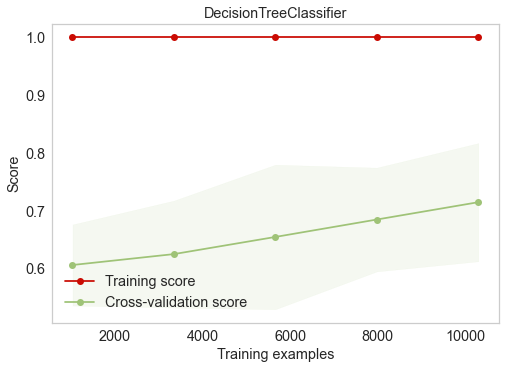

---------------------- SupportVectorClassifier --------------------------
Accuracy_Score 0.8543123543123543
SCORE 0.8543123543123543
Confusion metrics
[[1116  179]
 [ 196 1083]]
CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      1295
           1       0.86      0.85      0.85      1279

    accuracy                           0.85      2574
   macro avg       0.85      0.85      0.85      2574
weighted avg       0.85      0.85      0.85      2574

Cross_Val_Score 0.7029147947531158
ROC AUC CURVE


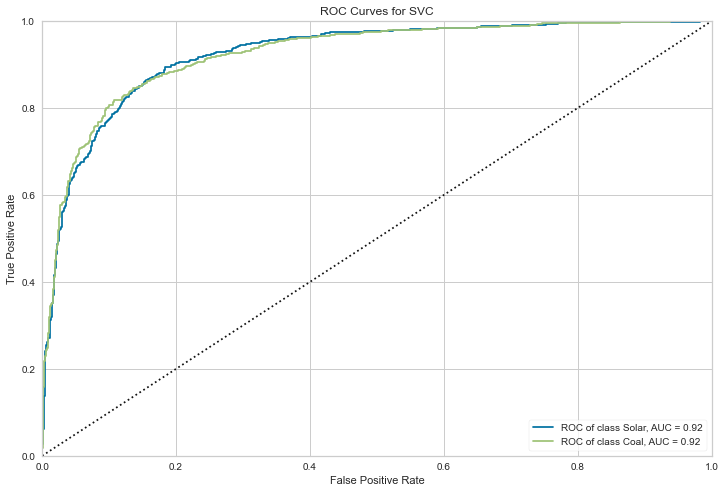

MODEL LEARNING CURVE


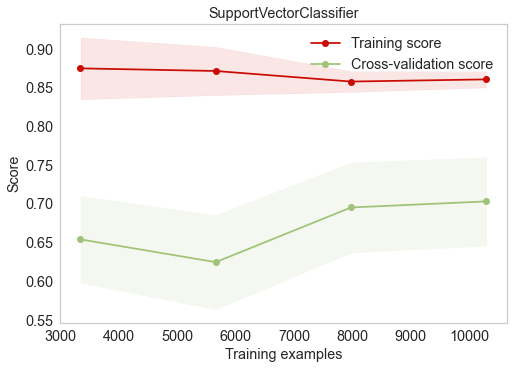

In [100]:
Score=[]
CVS=[]
MODEL=[]
for name,model in models_classification.items():
    print("----------------------",name,"--------------------------")
    MODEL.append(name)
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    ac=accuracy_score(y_test,y_pred)
    Score.append(ac)
    print("Accuracy_Score",ac)
    print("SCORE",model.score(x_test,y_test))
    cm=confusion_matrix(y_test,y_pred)
    print('Confusion metrics')
    print(cm)
    print("CLASSIFICATION REPORT")
    report=classification_report(y_test,y_pred)
    print(report)
    csv=cross_val_score(model,x_new,y_new,cv=5).mean()
    CVS.append(csv*100)
    print("Cross_Val_Score",csv)
    print("ROC AUC CURVE")
    plt.figure(figsize=(12,8))
    roc_auc(model,x_train,y_train,X_test=x_test,y_test=y_test,classes=['Solar','Coal','Wind','Gas','Hydro','Biomass','Oil','Nuclear'],micro=False,macro=False)

    print("MODEL LEARNING CURVE")
    skplt.estimators.plot_learning_curve(model,x_new,y_new,cv=5,scoring='accuracy',text_fontsize='large',title=name)
    plt.show()

In [101]:
#making a dataframe of the models
models_csv=pd.DataFrame({
    'Models':MODEL,
    "Accuracy Score":Score,
    'Cross_val_score':CVS
})

models_csv

Models  Accuracy Score  Cross_val_score
0          AdaBoostClassifier        0.818959        64.999141
1  GradientBoostingClassifier        0.853535        64.742465
2      RandomForestClassifier        0.940559        75.754447
3      DecisionTreeClassifier        0.891220        71.176620
4     SupportVectorClassifier        0.854312        70.291479

## We will be selecting Random Forest Classifier as it is giving us accuracy_score of 0.94 and good metrics of  model.

## Hyperparameter tuning our best ML model:

In [102]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [103]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [105]:
param_class={
 'criterion': ['gini','entropy', 'log_loss'],
 'max_depth': [None,1,2,3],
 'max_features': ['sqrt','log2', None],
 'max_samples': [None,1,2]}

In [106]:
Grid_classifier=GridSearchCV(estimator=rfc,param_grid=param_class,cv=5)

In [107]:
Grid_classifier.fit(x_new,y_new)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 1, 2, 3],
                         'max_features': ['sqrt', 'log2', None],
                         'max_samples': [None, 1, 2]})

In [108]:
Grid_classifier.best_params_

{'criterion': 'log_loss',
 'max_depth': None,
 'max_features': 'log2',
 'max_samples': None}

In [109]:
Grid_classifier.best_score_

0.7655488485259181

## Final Model Learning Curve:

In [111]:
rfcr=RandomForestClassifier(
 criterion= 'log_loss',
 max_depth= None,
 max_features= 'log2',
 max_samples= None)

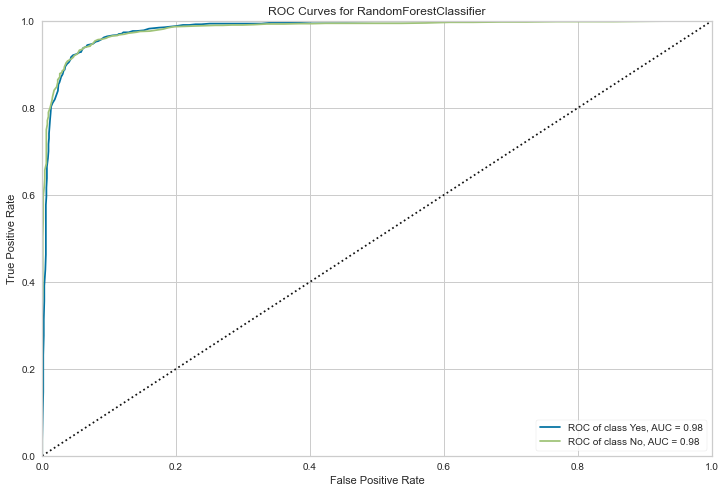

MODEL LEARNING CURVE


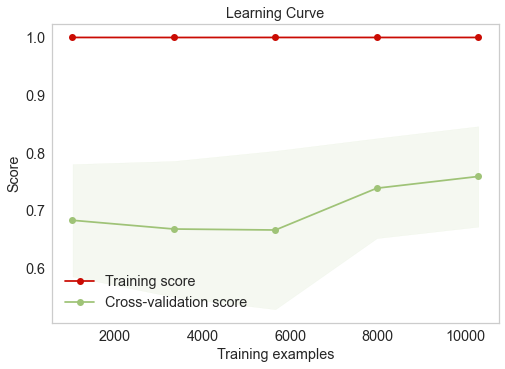

In [113]:
plt.figure(figsize=(12,8))
roc_auc(rfcr,x_train,y_train,X_test=x_test,y_test=y_test,classes=['Yes','No'],micro=False,macro=False)
print("MODEL LEARNING CURVE")
skplt.estimators.plot_learning_curve(rfcr,x_new,y_new,cv=5,scoring='accuracy',text_fontsize='large')
plt.show()

## Final Model Metrics:

In [114]:
rfcr.fit(x_train,y_train)
pred_rfcr=rfcr.predict(x_test)
print("Accuracy_score",accuracy_score(y_test,pred_rfcr))
print("Confusion Matrics")
print(confusion_matrix(y_test,pred_rfcr))
print("Classification Report")
print(classification_report(y_test,pred_rfcr))

Accuracy_score 0.9386169386169386
Confusion Matrics
[[1219   76]
 [  82 1197]]
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1295
           1       0.94      0.94      0.94      1279

    accuracy                           0.94      2574
   macro avg       0.94      0.94      0.94      2574
weighted avg       0.94      0.94      0.94      2574



## The Accuracy score of final classification model is 93.86%

## Saving the model:

In [115]:
joblib.dump(Grid_classifier,"Final_Classification_Model_Rainfall.obj")

['Final_Classification_Model_Rainfall.obj']

## Loading the model:

In [116]:
model=joblib.load('Final_Classification_Model_Rainfall.obj')

In [117]:
model.predict(x_test)

array([0, 1, 0, ..., 0, 1, 1])

## Conclusion

1. In this model analysis, we build two models- (a) which can predict Rainfall and (b) which can predict RainTomorrow.

2. For the Rainfall model, we did lot of EDA to understand the importnace of feature over target column.

3. We build a Regression model for the target column 'Rainfall' and as RandomForestRegressor gave good accuracy and good metrics score so we chose it as our final model.

4. We removed outliers while building the regression model because it will affect the accuracy of the model.

5. For building the second model i.e., classification model, we used upsampling SMOTE as it doesn't paste the sample again and again but it does sampling synthetically.

6. Later we applied classifier algorithms and found that Random Forest Classifier was giving good metrics as compared to other classifiers so we proceeded with Random Forest Classifier to build our final classification model.

7. While building classification model, we removed outliers because there was some continous columns and we used percentile method to remove outliers.

8. From Final Regression model, the R2 score is 73.76% and from Final Classification model, the accuracy score is 93.86%.